In [60]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib widget

In [61]:
dataFile = './data/unsaturatedPulses.csv'
pulsesIndexRange = [220,500] # Gathered pulses have their peaks around sample #250
pulseLength = max(pulsesIndexRange) - min(pulsesIndexRange)
reducedPulseLength = 260 # When alignment occurs
baselineRange = range(0,60) # Number of samples to be averaged to estimate baseline on each pulse
expectedPeakPosition = 20 # We'll align the pulses and expect the peak at this sample
# leadingAreaFactor = (expectedPeakPosition / reducedPulseLength) * 2 # Hard-setting the integration limits to take only the tail into account
# trailingAreaFactor = 1 - leadingAreaFactor # Tail starts just after peak
hardTailIntegrationLimit = 20 # Only used for manual setting integration inferior tail integration range, referenced to pulse sample position

## Importing and preparring dataset

In [3]:

dfOriginal = pd.read_csv(dataFile, index_col=0)
dfOriginal.index = dfOriginal.index.astype(int)


## Computing baseline

In [5]:
dfBl = dfOriginal.copy()
dfBl.index = dfBl.index.astype(int)
dfBl = dfBl.iloc[:,baselineRange]
dfBl["Baseline"] = dfBl.apply(lambda row: sum(row) / len(row), axis = 1)
dfBl

0    1    2    3    4    5    6    7    8    9  ...   51   52   53  \
0      133  135  131  135  131  133  134  131  134  133  ...  133  134  134   
1      133  135  131  135  131  133  134  131  134  133  ...  133  134  134   
2      133  135  131  135  131  133  134  131  134  133  ...  133  134  134   
3      133  135  131  135  131  133  134  131  134  133  ...  133  134  134   
4      133  135  131  135  131  133  134  131  134  133  ...  133  134  134   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
51393  132  134  133  134  132  133  133  133  133  133  ...  133  133  133   
51394  134  133  133  134  134  133  131  134  134  133  ...  133  132  135   
51395  132  134  133  134  132  133  133  133  133  134  ...  133  133  133   
51396  133  133  133  134  133  134  133  133  133  133  ...  134  132  133   
51397  132  135  132  134  133  132  135  134  132  135  ...  135  131  134   

        54   55   56   57   58   59    Baseline  
0      133  134  133  135  132  133  133.066667  
1      133  134  133  135  132  133  133.066667  
2      133  134  133  135  132  133  133.066667  
3      133  134  133  135  132  133  133.066667  
4      133  134  133  135  132  133  133.066667  
...    ...  ...  ...  ...  ...  ...         ...  
51393  132  133  133  134  134  132  133.000000  
51394  133  133  135  133  133  134  133.133333  
51395  132  133  133  134  133  133  133.100000  
51396  134  133  133  132  133  134  133.116667  
51397  133  132  134  132  133  134  133.033333  

[51398 rows x 61 columns]

In [6]:
print(dfBl["Baseline"].min())
print(dfBl["Baseline"].max())

130.81666666666666
133.4


## Creating cropped pulses dataframe

In [7]:
dfOriginal.drop_duplicates(inplace = True)
dfPulses = dfOriginal.T
dfPulses.index = dfPulses.index.astype(int)
dfPulses = dfPulses.loc[range(pulsesIndexRange[0], pulsesIndexRange[1])]
dfPulses = dfPulses.T
dfPulses["Baseline"] = dfBl["Baseline"]
dfPulses

220  221  222  223  224  225  226  227  228  229  ...  491  492  493  \
0      134  133  132  134  132  135  132  133  134  132  ...  133  133  133   
5      133  132  133  134  132  134  133  133  133  132  ...  133  133  134   
10     133  133  133  133  133  132  133  134  133  134  ...  133  133  134   
11     133  134  133  133  133  133  132  133  132  133  ...  133  132  133   
12     133  135  131  135  132  133  134  132  134  133  ...  132  133  133   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
51393  133  133  134  132  133  134  132  134  132  133  ...  133  131  133   
51394  136  134  130  137  131  132  134  131  134  134  ...  134  132  134   
51395  133  134  133  133  133  133  133  134  133  134  ...  132  134  133   
51396  133  132  132  134  134  133  132  134  133  133  ...  133  133  133   
51397  132  134  132  133  133  132  133  134  132  134  ...  135  133  132   

       494  495  496  497  498  499    Baseline  
0      132  133  133  134  132  134  133.066667  
5      132  133  131  132  134  133  132.983333  
10     131  134  132  133  133  132  132.950000  
11     132  133  132  134  133  133  133.166667  
12     132  134  132  133  133  132  133.116667  
...    ...  ...  ...  ...  ...  ...         ...  
51393  132  134  134  132  134  133  133.000000  
51394  132  133  133  133  133  133  133.133333  
51395  131  135  130  133  135  131  133.100000  
51396  133  134  133  134  133  133  133.116667  
51397  135  132  133  135  130  135  133.033333  

[36834 rows x 281 columns]

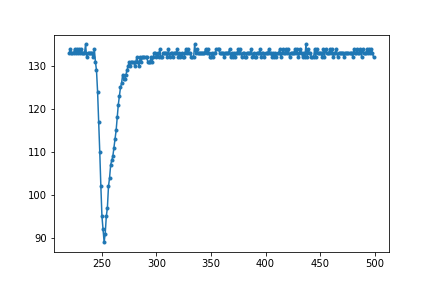

In [416]:
%matplotlib widget
plt.plot(dfPulses.iloc[18, :max(pulsesIndexRange) - min(pulsesIndexRange)], '.-')
plt.show()

## Flipping pulses and removing baseline

In [417]:
dfPulses.iloc[0]

220         134.000000
221         133.000000
222         132.000000
223         134.000000
224         132.000000
               ...    
496         133.000000
497         134.000000
498         132.000000
499         134.000000
Baseline    133.066667
Name: 0, Length: 281, dtype: float64

In [418]:
dfPulses["Baseline"][0]

133.06666666666666

# DO NOT EXECUTE THE FOLLOWING CELL IF NOT REQUIRED

In [419]:
###############################################
# BE CAREFUL -> This process takes lots of time
###############################################

# Removing baseline and turning around pulses
dfPulsesNoBl = dfPulses.copy()
# for i in dfPulses.index:
#     dfPulsesNoBl.iloc[i, :max(pulsesIndexRange) - min(pulsesIndexRange)] =  dfPulses["Baseline"][i] - dfPulses.iloc[i, :max(pulsesIndexRange) - min(pulsesIndexRange)]

dfPulsesNoBl.loc[:, dfPulsesNoBl.columns[:pulseLength]] = dfPulsesNoBl[dfPulsesNoBl.columns[:pulseLength]].apply(lambda x: dfPulsesNoBl["Baseline"] - x)
# dfPulsesNoBl.iloc[:, :max(pulsesIndexRange) - min(pulsesIndexRange)] = dfPulses["Baseline"] - dfPulses.iloc[:, :max(pulsesIndexRange) - min(pulsesIndexRange)]

dfPulsesNoBl.to_csv("./data/output/pulsesWithoutBaseline.csv")
###############################################
# BE CAREFUL -> This process takes lots of time
###############################################

In [420]:
dfPulsesNoBl

220       221       222       223       224       225       226  \
0     -0.933333  0.066667  1.066667 -0.933333  1.066667 -1.933333  1.066667   
5     -0.016667  0.983333 -0.016667 -1.016667  0.983333 -1.016667 -0.016667   
10    -0.050000 -0.050000 -0.050000 -0.050000 -0.050000  0.950000 -0.050000   
11     0.166667 -0.833333  0.166667  0.166667  0.166667  0.166667  1.166667   
12     0.116667 -1.883333  2.116667 -1.883333  1.116667  0.116667 -0.883333   
...         ...       ...       ...       ...       ...       ...       ...   
51393  0.000000  0.000000 -1.000000  1.000000  0.000000 -1.000000  1.000000   
51394 -2.866667 -0.866667  3.133333 -3.866667  2.133333  1.133333 -0.866667   
51395  0.100000 -0.900000  0.100000  0.100000  0.100000  0.100000  0.100000   
51396  0.116667  1.116667  1.116667 -0.883333 -0.883333  0.116667  1.116667   
51397  1.033333 -0.966667  1.033333  0.033333  0.033333  1.033333  0.033333   

            227       228       229  ...       491       492       493  \
0      0.066667 -0.933333  1.066667  ...  0.066667  0.066667  0.066667   
5     -0.016667 -0.016667  0.983333  ... -0.016667 -0.016667 -1.016667   
10    -1.050000 -0.050000 -1.050000  ... -0.050000 -0.050000 -1.050000   
11     0.166667  1.166667  0.166667  ...  0.166667  1.166667  0.166667   
12     1.116667 -0.883333  0.116667  ...  1.116667  0.116667  0.116667   
...         ...       ...       ...  ...       ...       ...       ...   
51393 -1.000000  1.000000  0.000000  ...  0.000000  2.000000  0.000000   
51394  2.133333 -0.866667 -0.866667  ... -0.866667  1.133333 -0.866667   
51395 -0.900000  0.100000 -0.900000  ...  1.100000 -0.900000  0.100000   
51396 -0.883333  0.116667  0.116667  ...  0.116667  0.116667  0.116667   
51397 -0.966667  1.033333 -0.966667  ... -1.966667  0.033333  1.033333   

            494       495       496       497       498       499    Baseline  
0      1.066667  0.066667  0.066667 -0.933333  1.066667 -0.933333  133.066667  
5      0.983333 -0.016667  1.983333  0.983333 -1.016667 -0.016667  132.983333  
10     1.950000 -1.050000  0.950000 -0.050000 -0.050000  0.950000  132.950000  
11     1.166667  0.166667  1.166667 -0.833333  0.166667  0.166667  133.166667  
12     1.116667 -0.883333  1.116667  0.116667  0.116667  1.116667  133.116667  
...         ...       ...       ...       ...       ...       ...         ...  
51393  1.000000 -1.000000 -1.000000  1.000000 -1.000000  0.000000  133.000000  
51394  1.133333  0.133333  0.133333  0.133333  0.133333  0.133333  133.133333  
51395  2.100000 -1.900000  3.100000  0.100000 -1.900000  2.100000  133.100000  
51396  0.116667 -0.883333  0.116667 -0.883333  0.116667  0.116667  133.116667  
51397 -1.966667  1.033333  0.033333 -1.966667  3.033333 -1.966667  133.033333  

[36834 rows x 281 columns]

In [4]:
dfPulsesNoBl = pd.read_csv("./data/output/pulsesWithoutBaseline.csv", index_col = 0)
dfPulsesNoBl

220       221       222       223       224       225       226  \
0     -0.933333  0.066667  1.066667 -0.933333  1.066667 -1.933333  1.066667   
5     -0.016667  0.983333 -0.016667 -1.016667  0.983333 -1.016667 -0.016667   
10    -0.050000 -0.050000 -0.050000 -0.050000 -0.050000  0.950000 -0.050000   
11     0.166667 -0.833333  0.166667  0.166667  0.166667  0.166667  1.166667   
12     0.116667 -1.883333  2.116667 -1.883333  1.116667  0.116667 -0.883333   
...         ...       ...       ...       ...       ...       ...       ...   
51393  0.000000  0.000000 -1.000000  1.000000  0.000000 -1.000000  1.000000   
51394 -2.866667 -0.866667  3.133333 -3.866667  2.133333  1.133333 -0.866667   
51395  0.100000 -0.900000  0.100000  0.100000  0.100000  0.100000  0.100000   
51396  0.116667  1.116667  1.116667 -0.883333 -0.883333  0.116667  1.116667   
51397  1.033333 -0.966667  1.033333  0.033333  0.033333  1.033333  0.033333   

            227       228       229  ...       491       492       493  \
0      0.066667 -0.933333  1.066667  ...  0.066667  0.066667  0.066667   
5     -0.016667 -0.016667  0.983333  ... -0.016667 -0.016667 -1.016667   
10    -1.050000 -0.050000 -1.050000  ... -0.050000 -0.050000 -1.050000   
11     0.166667  1.166667  0.166667  ...  0.166667  1.166667  0.166667   
12     1.116667 -0.883333  0.116667  ...  1.116667  0.116667  0.116667   
...         ...       ...       ...  ...       ...       ...       ...   
51393 -1.000000  1.000000  0.000000  ...  0.000000  2.000000  0.000000   
51394  2.133333 -0.866667 -0.866667  ... -0.866667  1.133333 -0.866667   
51395 -0.900000  0.100000 -0.900000  ...  1.100000 -0.900000  0.100000   
51396 -0.883333  0.116667  0.116667  ...  0.116667  0.116667  0.116667   
51397 -0.966667  1.033333 -0.966667  ... -1.966667  0.033333  1.033333   

            494       495       496       497       498       499    Baseline  
0      1.066667  0.066667  0.066667 -0.933333  1.066667 -0.933333  133.066667  
5      0.983333 -0.016667  1.983333  0.983333 -1.016667 -0.016667  132.983333  
10     1.950000 -1.050000  0.950000 -0.050000 -0.050000  0.950000  132.950000  
11     1.166667  0.166667  1.166667 -0.833333  0.166667  0.166667  133.166667  
12     1.116667 -0.883333  1.116667  0.116667  0.116667  1.116667  133.116667  
...         ...       ...       ...       ...       ...       ...         ...  
51393  1.000000 -1.000000 -1.000000  1.000000 -1.000000  0.000000  133.000000  
51394  1.133333  0.133333  0.133333  0.133333  0.133333  0.133333  133.133333  
51395  2.100000 -1.900000  3.100000  0.100000 -1.900000  2.100000  133.100000  
51396  0.116667 -0.883333  0.116667 -0.883333  0.116667  0.116667  133.116667  
51397 -1.966667  1.033333  0.033333 -1.966667  3.033333 -1.966667  133.033333  

[36834 rows x 281 columns]

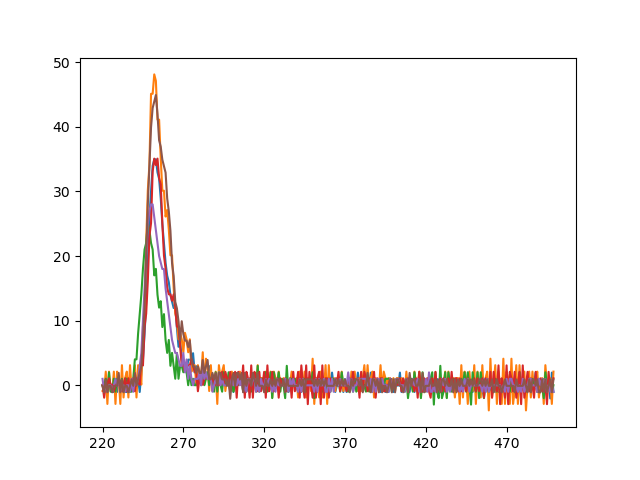

In [5]:
%matplotlib widget
dfPulsesNoBl.iloc[49:55, :max(pulsesIndexRange) - min(pulsesIndexRange)].T.plot(legend = None)
plt.show()

## Computing pulse area (integration) and plotting histogram

In [10]:
dfPulsesNoBl["Area"] = dfPulsesNoBl[dfPulsesNoBl.columns[:pulseLength]].sum(axis = 1)
dfPulsesNoBl

220       221       222       223       224       225       226  \
0     -0.933333  0.066667  1.066667 -0.933333  1.066667 -1.933333  1.066667   
5     -0.016667  0.983333 -0.016667 -1.016667  0.983333 -1.016667 -0.016667   
10    -0.050000 -0.050000 -0.050000 -0.050000 -0.050000  0.950000 -0.050000   
11     0.166667 -0.833333  0.166667  0.166667  0.166667  0.166667  1.166667   
12     0.116667 -1.883333  2.116667 -1.883333  1.116667  0.116667 -0.883333   
...         ...       ...       ...       ...       ...       ...       ...   
51393  0.000000  0.000000 -1.000000  1.000000  0.000000 -1.000000  1.000000   
51394 -2.866667 -0.866667  3.133333 -3.866667  2.133333  1.133333 -0.866667   
51395  0.100000 -0.900000  0.100000  0.100000  0.100000  0.100000  0.100000   
51396  0.116667  1.116667  1.116667 -0.883333 -0.883333  0.116667  1.116667   
51397  1.033333 -0.966667  1.033333  0.033333  0.033333  1.033333  0.033333   

            227       228       229  ...       492       493       494  \
0      0.066667 -0.933333  1.066667  ...  0.066667  0.066667  1.066667   
5     -0.016667 -0.016667  0.983333  ... -0.016667 -1.016667  0.983333   
10    -1.050000 -0.050000 -1.050000  ... -0.050000 -1.050000  1.950000   
11     0.166667  1.166667  0.166667  ...  1.166667  0.166667  1.166667   
12     1.116667 -0.883333  0.116667  ...  0.116667  0.116667  1.116667   
...         ...       ...       ...  ...       ...       ...       ...   
51393 -1.000000  1.000000  0.000000  ...  2.000000  0.000000  1.000000   
51394  2.133333 -0.866667 -0.866667  ...  1.133333 -0.866667  1.133333   
51395 -0.900000  0.100000 -0.900000  ... -0.900000  0.100000  2.100000   
51396 -0.883333  0.116667  0.116667  ...  0.116667  0.116667  0.116667   
51397 -0.966667  1.033333 -0.966667  ...  0.033333  1.033333 -1.966667   

            495       496       497       498       499    Baseline  \
0      0.066667  0.066667 -0.933333  1.066667 -0.933333  133.066667   
5     -0.016667  1.983333  0.983333 -1.016667 -0.016667  132.983333   
10    -1.050000  0.950000 -0.050000 -0.050000  0.950000  132.950000   
11     0.166667  1.166667 -0.833333  0.166667  0.166667  133.166667   
12    -0.883333  1.116667  0.116667  0.116667  1.116667  133.116667   
...         ...       ...       ...       ...       ...         ...   
51393 -1.000000 -1.000000  1.000000 -1.000000  0.000000  133.000000   
51394  0.133333  0.133333  0.133333  0.133333  0.133333  133.133333   
51395 -1.900000  3.100000  0.100000 -1.900000  2.100000  133.100000   
51396 -0.883333  0.116667 -0.883333  0.116667  0.116667  133.116667   
51397  1.033333  0.033333 -1.966667  3.033333 -1.966667  133.033333   

             Area  
0      779.666667  
5      630.333333  
10     375.000000  
11     895.666667  
12     757.666667  
...           ...  
51393  438.000000  
51394  471.333333  
51395  840.000000  
51396  409.666667  
51397  766.333333  

[36834 rows x 282 columns]

In [11]:
def computeHistogramBins(data, desired_bin_size):
    min_val = np.min(data)
    max_val = np.max(data)
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)
    return bins

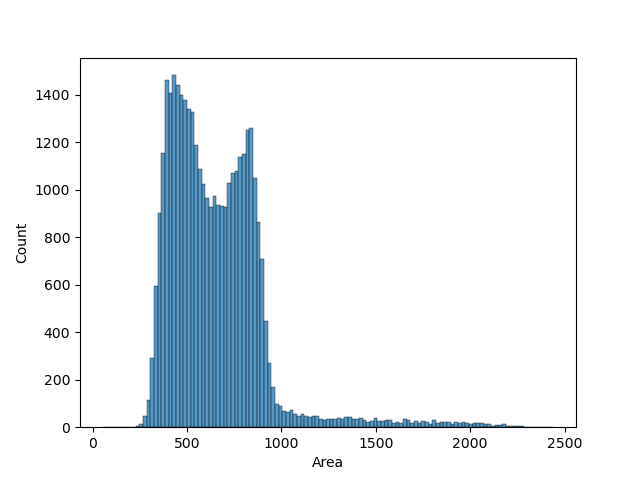

In [12]:
%matplotlib widget
bins = computeHistogramBins(dfPulsesNoBl["Area"], 5)
# plt.hist(dfPulsesNoBl["Area"], bins = bins)
sns.histplot(dfPulsesNoBl["Area"])

plt.show()

## Aligning pulses respect to their peaks

In [13]:
peakLocations = dfPulsesNoBl[dfPulsesNoBl.columns[:pulseLength]].idxmax(axis = 1)
peakLocations = peakLocations.astype(int)
peakLocations.sum()/len(peakLocations)

251.79356029755118

In [14]:
dfPulsesNoBl["PeakLocation"] = peakLocations
dfPulsesNoBl

220       221       222       223       224       225       226  \
0     -0.933333  0.066667  1.066667 -0.933333  1.066667 -1.933333  1.066667   
5     -0.016667  0.983333 -0.016667 -1.016667  0.983333 -1.016667 -0.016667   
10    -0.050000 -0.050000 -0.050000 -0.050000 -0.050000  0.950000 -0.050000   
11     0.166667 -0.833333  0.166667  0.166667  0.166667  0.166667  1.166667   
12     0.116667 -1.883333  2.116667 -1.883333  1.116667  0.116667 -0.883333   
...         ...       ...       ...       ...       ...       ...       ...   
51393  0.000000  0.000000 -1.000000  1.000000  0.000000 -1.000000  1.000000   
51394 -2.866667 -0.866667  3.133333 -3.866667  2.133333  1.133333 -0.866667   
51395  0.100000 -0.900000  0.100000  0.100000  0.100000  0.100000  0.100000   
51396  0.116667  1.116667  1.116667 -0.883333 -0.883333  0.116667  1.116667   
51397  1.033333 -0.966667  1.033333  0.033333  0.033333  1.033333  0.033333   

            227       228       229  ...       493       494       495  \
0      0.066667 -0.933333  1.066667  ...  0.066667  1.066667  0.066667   
5     -0.016667 -0.016667  0.983333  ... -1.016667  0.983333 -0.016667   
10    -1.050000 -0.050000 -1.050000  ... -1.050000  1.950000 -1.050000   
11     0.166667  1.166667  0.166667  ...  0.166667  1.166667  0.166667   
12     1.116667 -0.883333  0.116667  ...  0.116667  1.116667 -0.883333   
...         ...       ...       ...  ...       ...       ...       ...   
51393 -1.000000  1.000000  0.000000  ...  0.000000  1.000000 -1.000000   
51394  2.133333 -0.866667 -0.866667  ... -0.866667  1.133333  0.133333   
51395 -0.900000  0.100000 -0.900000  ...  0.100000  2.100000 -1.900000   
51396 -0.883333  0.116667  0.116667  ...  0.116667  0.116667 -0.883333   
51397 -0.966667  1.033333 -0.966667  ...  1.033333 -1.966667  1.033333   

            496       497       498       499    Baseline        Area  \
0      0.066667 -0.933333  1.066667 -0.933333  133.066667  779.666667   
5      1.983333  0.983333 -1.016667 -0.016667  132.983333  630.333333   
10     0.950000 -0.050000 -0.050000  0.950000  132.950000  375.000000   
11     1.166667 -0.833333  0.166667  0.166667  133.166667  895.666667   
12     1.116667  0.116667  0.116667  1.116667  133.116667  757.666667   
...         ...       ...       ...       ...         ...         ...   
51393 -1.000000  1.000000 -1.000000  0.000000  133.000000  438.000000   
51394  0.133333  0.133333  0.133333  0.133333  133.133333  471.333333   
51395  3.100000  0.100000 -1.900000  2.100000  133.100000  840.000000   
51396  0.116667 -0.883333  0.116667  0.116667  133.116667  409.666667   
51397  0.033333 -1.966667  3.033333 -1.966667  133.033333  766.333333   

       PeakLocation  
0               254  
5               253  
10              251  
11              254  
12              251  
...             ...  
51393           250  
51394           250  
51395           252  
51396           249  
51397           254  

[36834 rows x 283 columns]

In [15]:
peakLocationNormalized = dfPulsesNoBl["PeakLocation"] - int(dfPulsesNoBl.columns[0])
peakLocationNormalized

0        34
5        33
10       31
11       34
12       31
         ..
51393    30
51394    30
51395    32
51396    29
51397    34
Name: PeakLocation, Length: 36834, dtype: int64

In [16]:
maxOffset = max(peakLocationNormalized) - expectedPeakPosition
maxOffset

214

In [17]:
dfPulsesNoBl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36834 entries, 0 to 51397
Columns: 283 entries, 220 to PeakLocation
dtypes: float64(282), int64(1)
memory usage: 79.8 MB


# DO NOT EXECUTE THE FOLLOWING CELL IF NOT REQUIRED

In [393]:
###############################################
# BE CAREFUL -> This process takes lots of time
###############################################

columnOffset = int(dfPulsesNoBl.columns[0])
dfPulsesNoBlT = dfPulsesNoBl.T.iloc[:pulseLength]

# Initializing DF with expected data structure
dfAlignedPulses = pd.DataFrame(range(reducedPulseLength)).T
dfAlignedPulses = dfAlignedPulses.drop(dfAlignedPulses.index[0])

thisStartingIndex = (peakLocationNormalized - expectedPeakPosition)

for i in range(len(dfPulsesNoBl.iloc[:])):
    try:
        dfAlignedPulses.loc[dfPulsesNoBl.index[i]] = dfPulsesNoBlT.iloc[thisStartingIndex.iloc[i]:thisStartingIndex.iloc[i] + reducedPulseLength, i].to_list()
    except ValueError:
        print("Index " + str(i) + " skipped due to multiple pulses in trace")

dfAlignedPulses

###############################################
# BE CAREFUL -> This process takes lots of time
###############################################

Index 4558 skipped due to multiple pulses in trace
Index 21171 skipped due to multiple pulses in trace


0         1         2         3         4         5         6    \
0      2.066667 -1.933333  1.066667  1.066667 -0.933333  1.066667 -1.933333   
5     -1.016667  0.983333 -1.016667  0.983333  0.983333 -0.016667  0.983333   
10    -0.050000 -0.050000 -0.050000 -0.050000 -0.050000 -0.050000 -1.050000   
11     0.166667 -0.833333  1.166667 -0.833333  2.166667 -0.833333  0.166667   
12     0.116667  0.116667 -0.883333  0.116667  0.116667  1.116667 -0.883333   
...         ...       ...       ...       ...       ...       ...       ...   
51393  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
51394  2.133333 -2.866667  0.133333  0.133333  1.133333  1.133333 -0.866667   
51395  0.100000  0.100000  0.100000 -0.900000  0.100000 -0.900000  1.100000   
51396  0.116667  0.116667  0.116667  0.116667  0.116667  0.116667 -1.883333   
51397  0.033333 -0.966667  1.033333 -1.966667  1.033333 -0.966667  0.033333   

            7         8         9    ...       240       241       242  \
0      0.066667  1.066667 -1.933333  ... -0.933333 -0.933333  0.066667   
5      0.983333 -1.016667  1.983333  ...  0.983333 -0.016667 -0.016667   
10     0.950000 -1.050000 -0.050000  ...  0.950000 -0.050000  0.950000   
11    -0.833333  0.166667  1.166667  ...  1.166667  0.166667  1.166667   
12     2.116667  0.116667  0.116667  ...  0.116667 -0.883333  0.116667   
...         ...       ...       ...  ...       ...       ...       ...   
51393  0.000000  1.000000  0.000000  ...  1.000000  0.000000  0.000000   
51394  0.133333  0.133333 -0.866667  ...  0.133333  1.133333  0.133333   
51395  0.100000  0.100000  1.100000  ...  0.100000  1.100000  0.100000   
51396  1.116667  0.116667  1.116667  ... -0.883333  1.116667  0.116667   
51397  1.033333  0.033333  0.033333  ...  0.033333  0.033333  0.033333   

            243       244       245       246       247       248       249  
0     -0.933333  1.066667 -0.933333  0.066667  0.066667  1.066667  0.066667  
5      0.983333 -1.016667 -0.016667 -1.016667 -0.016667 -0.016667 -0.016667  
10     0.950000 -1.050000  1.950000 -1.050000 -0.050000 -0.050000 -1.050000  
11     0.166667  0.166667  0.166667  1.166667 -0.833333  0.166667  1.166667  
12     0.116667  0.116667  1.116667 -0.883333  1.116667  0.116667  0.116667  
...         ...       ...       ...       ...       ...       ...       ...  
51393  0.000000  0.000000 -1.000000  0.000000 -1.000000  1.000000 -1.000000  
51394  0.133333  1.133333  0.133333  1.133333 -0.866667  0.133333 -0.866667  
51395  0.100000  1.100000 -0.900000  2.100000 -0.900000  1.100000  1.100000  
51396  0.116667 -0.883333  0.116667  0.116667  0.116667  0.116667  1.116667  
51397  0.033333  1.033333 -0.966667  2.033333 -0.966667  0.033333  0.033333  

[36832 rows x 250 columns]

In [18]:
# Just to verify that all the pulses are aligned
peaksAligned = dfAlignedPulses[dfAlignedPulses.columns[:reducedPulseLength]].idxmax(axis = 1)
print(min(peaksAligned))
print(max(peaksAligned))


NameError: name 'dfAlignedPulses' is not defined

In [432]:
dfAlignedPulses["Area"] = dfAlignedPulses[dfAlignedPulses.columns[:reducedPulseLength]].sum(axis = 1)
dfAlignedPulses

0       1       2       3       4       5       6       7       8  \
0      2.0667 -1.9333  1.0667  1.0667 -0.9333  1.0667 -1.9333  0.0667  1.0667   
5     -1.0167  0.9833 -1.0167  0.9833  0.9833 -0.0167  0.9833  0.9833 -1.0167   
10    -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -1.0500  0.9500 -1.0500   
11     0.1667 -0.8333  1.1667 -0.8333  2.1667 -0.8333  0.1667 -0.8333  0.1667   
12     0.1167  0.1167 -0.8833  0.1167  0.1167  1.1167 -0.8833  2.1167  0.1167   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
51393  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000  1.0000   
51394  2.1333 -2.8667  0.1333  0.1333  1.1333  1.1333 -0.8667  0.1333  0.1333   
51395  0.1000  0.1000  0.1000 -0.9000  0.1000 -0.9000  1.1000  0.1000  0.1000   
51396  0.1167  0.1167  0.1167  0.1167  0.1167  0.1167 -1.8833  1.1167  0.1167   
51397  0.0333 -0.9667  1.0333 -1.9667  1.0333 -0.9667  0.0333  1.0333  0.0333   

            9  ...     244     245     246     247     248     249     Area  \
0     -1.9333  ...  1.0667 -0.9333  0.0667  0.0667  1.0667  0.0667  778.675   
5      1.9833  ... -1.0167 -0.0167 -1.0167 -0.0167 -0.0167 -0.0167  630.825   
10    -0.0500  ... -1.0500  1.9500 -1.0500 -0.0500 -0.0500 -1.0500  370.500   
11     1.1667  ...  0.1667  0.1667  1.1667 -0.8333  0.1667  1.1667  889.675   
12     0.1167  ...  0.1167  1.1167 -0.8833  1.1167  0.1167  0.1167  752.175   
...       ...  ...     ...     ...     ...     ...     ...     ...      ...   
51393  0.0000  ...  0.0000 -1.0000  0.0000 -1.0000  1.0000 -1.0000  438.000   
51394 -0.8667  ...  1.1333  0.1333  1.1333 -0.8667  0.1333 -0.8667  471.325   
51395  1.1000  ...  1.1000 -0.9000  2.1000 -0.9000  1.1000  1.1000  835.000   
51396  1.1167  ... -0.8833  0.1167  0.1167  0.1167  0.1167  1.1167  408.175   
51397  0.0333  ...  1.0333 -0.9667  2.0333 -0.9667  0.0333  0.0333  767.325   

       leadingArea  trailingArea     FOM  
0           -0.333       779.008  1.0004  
5            3.833       626.992  0.9939  
10          -1.500       372.000  1.0040  
11           1.667       888.008  0.9981  
12           2.167       750.008  0.9971  
...            ...           ...     ...  
51393        3.000       435.000  0.9932  
51394        0.333       470.992  0.9993  
51395        1.000       834.000  0.9988  
51396        1.167       407.008  0.9971  
51397       -0.667       767.992  1.0009  

[36832 rows x 254 columns]

In [433]:
# dfAlignedPulses["leadingArea"] = dfAlignedPulses[dfAlignedPulses.columns[:int(reducedPulseLength*leadingAreaFactor)]].sum(axis = 1)
dfAlignedPulses["leadingArea"] = dfAlignedPulses[dfAlignedPulses.columns[:hardTailIntegrationLimit]].sum(axis = 1)
# dfAlignedPulses["trailingArea"] = dfAlignedPulses[dfAlignedPulses.columns[int(reducedPulseLength*leadingAreaFactor):reducedPulseLength]].sum(axis = 1)
dfAlignedPulses["trailingArea"] = dfAlignedPulses[dfAlignedPulses.columns[hardTailIntegrationLimit:reducedPulseLength]].sum(axis = 1)
dfAlignedPulses

0       1       2       3       4       5       6       7       8  \
0      2.0667 -1.9333  1.0667  1.0667 -0.9333  1.0667 -1.9333  0.0667  1.0667   
5     -1.0167  0.9833 -1.0167  0.9833  0.9833 -0.0167  0.9833  0.9833 -1.0167   
10    -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -1.0500  0.9500 -1.0500   
11     0.1667 -0.8333  1.1667 -0.8333  2.1667 -0.8333  0.1667 -0.8333  0.1667   
12     0.1167  0.1167 -0.8833  0.1167  0.1167  1.1167 -0.8833  2.1167  0.1167   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
51393  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000  1.0000   
51394  2.1333 -2.8667  0.1333  0.1333  1.1333  1.1333 -0.8667  0.1333  0.1333   
51395  0.1000  0.1000  0.1000 -0.9000  0.1000 -0.9000  1.1000  0.1000  0.1000   
51396  0.1167  0.1167  0.1167  0.1167  0.1167  0.1167 -1.8833  1.1167  0.1167   
51397  0.0333 -0.9667  1.0333 -1.9667  1.0333 -0.9667  0.0333  1.0333  0.0333   

            9  ...     244     245     246     247     248     249     Area  \
0     -1.9333  ...  1.0667 -0.9333  0.0667  0.0667  1.0667  0.0667  778.675   
5      1.9833  ... -1.0167 -0.0167 -1.0167 -0.0167 -0.0167 -0.0167  630.825   
10    -0.0500  ... -1.0500  1.9500 -1.0500 -0.0500 -0.0500 -1.0500  370.500   
11     1.1667  ...  0.1667  0.1667  1.1667 -0.8333  0.1667  1.1667  889.675   
12     0.1167  ...  0.1167  1.1167 -0.8833  1.1167  0.1167  0.1167  752.175   
...       ...  ...     ...     ...     ...     ...     ...     ...      ...   
51393  0.0000  ...  0.0000 -1.0000  0.0000 -1.0000  1.0000 -1.0000  438.000   
51394 -0.8667  ...  1.1333  0.1333  1.1333 -0.8667  0.1333 -0.8667  471.325   
51395  1.1000  ...  1.1000 -0.9000  2.1000 -0.9000  1.1000  1.1000  835.000   
51396  1.1167  ... -0.8833  0.1167  0.1167  0.1167  0.1167  1.1167  408.175   
51397  0.0333  ...  1.0333 -0.9667  2.0333 -0.9667  0.0333  0.0333  767.325   

       leadingArea  trailingArea     FOM  
0          213.334       565.341  1.0004  
5          179.666       451.159  0.9939  
10         110.000       260.500  1.0040  
11         304.334       585.341  0.9981  
12         157.334       594.841  0.9971  
...            ...           ...     ...  
51393      130.000       308.000  0.9932  
51394      121.666       349.659  0.9993  
51395      226.000       609.000  0.9988  
51396       82.334       325.841  0.9971  
51397      218.666       548.659  1.0009  

[36832 rows x 254 columns]

In [434]:
dfAlignedPulses["FOM"] = (dfAlignedPulses["Area"] - dfAlignedPulses["leadingArea"]) / dfAlignedPulses["Area"]

# Rounding to optimize representation
#roundingColumns_Aligned = np.append(dfAlignedPulses.columns[:reducedPulseLength], ["Area", "leadingArea", "trailingArea", "FOM"])
roundingDecimals_Aligned = 4

dfAlignedPulses = dfAlignedPulses.astype('float32')
dfAlignedPulses = dfAlignedPulses.round(decimals = roundingDecimals_Aligned)
dfAlignedPulses.to_csv('./data/output/alignedPulses.csv')
dfAlignedPulses

0       1       2       3       4       5       6       7       8  \
0      2.0667 -1.9333  1.0667  1.0667 -0.9333  1.0667 -1.9333  0.0667  1.0667   
5     -1.0167  0.9833 -1.0167  0.9833  0.9833 -0.0167  0.9833  0.9833 -1.0167   
10    -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -1.0500  0.9500 -1.0500   
11     0.1667 -0.8333  1.1667 -0.8333  2.1667 -0.8333  0.1667 -0.8333  0.1667   
12     0.1167  0.1167 -0.8833  0.1167  0.1167  1.1167 -0.8833  2.1167  0.1167   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
51393  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000  1.0000   
51394  2.1333 -2.8667  0.1333  0.1333  1.1333  1.1333 -0.8667  0.1333  0.1333   
51395  0.1000  0.1000  0.1000 -0.9000  0.1000 -0.9000  1.1000  0.1000  0.1000   
51396  0.1167  0.1167  0.1167  0.1167  0.1167  0.1167 -1.8833  1.1167  0.1167   
51397  0.0333 -0.9667  1.0333 -1.9667  1.0333 -0.9667  0.0333  1.0333  0.0333   

            9  ...     244     245     246     247     248     249  \
0     -1.9333  ...  1.0667 -0.9333  0.0667  0.0667  1.0667  0.0667   
5      1.9833  ... -1.0167 -0.0167 -1.0167 -0.0167 -0.0167 -0.0167   
10    -0.0500  ... -1.0500  1.9500 -1.0500 -0.0500 -0.0500 -1.0500   
11     1.1667  ...  0.1667  0.1667  1.1667 -0.8333  0.1667  1.1667   
12     0.1167  ...  0.1167  1.1167 -0.8833  1.1167  0.1167  0.1167   
...       ...  ...     ...     ...     ...     ...     ...     ...   
51393  0.0000  ...  0.0000 -1.0000  0.0000 -1.0000  1.0000 -1.0000   
51394 -0.8667  ...  1.1333  0.1333  1.1333 -0.8667  0.1333 -0.8667   
51395  1.1000  ...  1.1000 -0.9000  2.1000 -0.9000  1.1000  1.1000   
51396  1.1167  ... -0.8833  0.1167  0.1167  0.1167  0.1167  1.1167   
51397  0.0333  ...  1.0333 -0.9667  2.0333 -0.9667  0.0333  0.0333   

             Area  leadingArea  trailingArea     FOM  
0      778.674988   213.334000    565.341003  0.7260  
5      630.825012   179.666000    451.158997  0.7152  
10     370.500000   110.000000    260.500000  0.7031  
11     889.674988   304.334015    585.341003  0.6579  
12     752.174988   157.334000    594.841003  0.7908  
...           ...          ...           ...     ...  
51393  438.000000   130.000000    308.000000  0.7032  
51394  471.325012   121.666000    349.658997  0.7419  
51395  835.000000   226.000000    609.000000  0.7293  
51396  408.174988    82.334000    325.841003  0.7983  
51397  767.325012   218.666000    548.658997  0.7150  

[36832 rows x 254 columns]

## Processing aligned pulses

In [112]:
dfAlignedPulses = pd.read_csv('./data/output/alignedPulses.csv', index_col = 0)
dfAlignedPulses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36832 entries, 0 to 51397
Columns: 264 entries, 0 to FOM
dtypes: float64(264)
memory usage: 74.5 MB


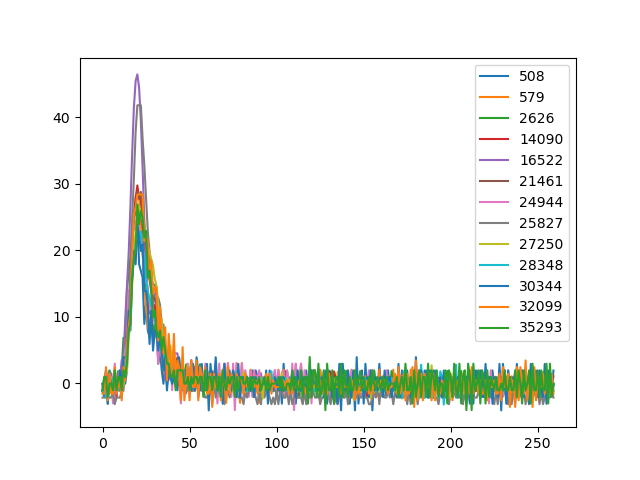

In [113]:
dfAlignedPulses[dfAlignedPulses.columns[:reducedPulseLength]].loc[dfAlignedPulses["trailingArea"] < 1].T.plot()
plt.show()

In [115]:
dfAlignedPulses

0       1       2       3       4       5       6       7       8  \
0      2.0667 -1.9333  1.0667  1.0667 -0.9333  1.0667 -1.9333  0.0667  1.0667   
5     -1.0167  0.9833 -1.0167  0.9833  0.9833 -0.0167  0.9833  0.9833 -1.0167   
10    -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -1.0500  0.9500 -1.0500   
11     0.1667 -0.8333  1.1667 -0.8333  2.1667 -0.8333  0.1667 -0.8333  0.1667   
12     0.1167  0.1167 -0.8833  0.1167  0.1167  1.1167 -0.8833  2.1167  0.1167   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
51393  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000  1.0000   
51394  2.1333 -2.8667  0.1333  0.1333  1.1333  1.1333 -0.8667  0.1333  0.1333   
51395  0.1000  0.1000  0.1000 -0.9000  0.1000 -0.9000  1.1000  0.1000  0.1000   
51396  0.1167  0.1167  0.1167  0.1167  0.1167  0.1167 -1.8833  1.1167  0.1167   
51397  0.0333 -0.9667  1.0333 -1.9667  1.0333 -0.9667  0.0333  1.0333  0.0333   

            9  ...     254     255     256     257     258     259      Area  \
0     -1.9333  ...  1.0667  0.0667  1.0667  0.0667  0.0667  0.0667  782.3333   
5      1.9833  ... -0.0167 -0.0167 -0.0167 -1.0167 -0.0167 -0.0167  628.6667   
10    -0.0500  ... -1.0500  0.9500 -0.0500  0.9500  0.9500 -0.0500  374.0000   
11     1.1667  ...  1.1667 -0.8333  0.1667  0.1667  1.1667  0.1667  892.3333   
12     0.1167  ...  0.1167  1.1167 -0.8833  1.1167  0.1167  1.1167  754.3333   
...       ...  ...     ...     ...     ...     ...     ...     ...       ...   
51393  0.0000  ...  1.0000 -1.0000  1.0000 -1.0000  0.0000  0.0000  437.0000   
51394 -0.8667  ...  1.1333 -0.8667  0.1333  0.1333  0.1333  0.1333  471.6666   
51395  1.1000  ...  1.1000 -1.9000  2.1000 -0.9000  1.1000  1.1000  838.0000   
51396  1.1167  ... -0.8833  1.1167  0.1167  1.1167  0.1167  1.1167  409.3334   
51397  0.0333  ...  2.0333 -1.9667  2.0333 -1.9667  0.0333  1.0333  765.6667   

       leadingArea  trailingArea     FOM  
0         652.6667      129.6667  0.1657  
5         527.3333      101.3333  0.1612  
10        335.0000       39.0000  0.1043  
11        748.6667      143.6667  0.1610  
12        629.6667      124.6667  0.1653  
...            ...           ...     ...  
51393     376.0000       61.0000  0.1396  
51394     403.3334       68.3333  0.1449  
51395     703.0000      135.0000  0.1611  
51396     330.6666       78.6667  0.1922  
51397     663.3333      102.3333  0.1337  

[36832 rows x 264 columns]

Area: 682.6580000000005


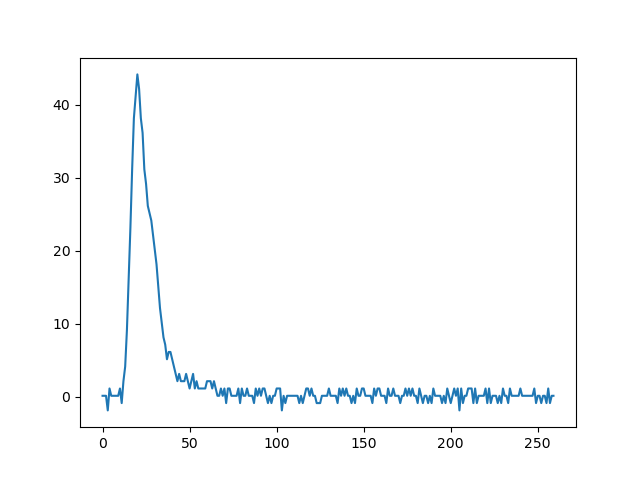

In [116]:
%matplotlib widget
print("Area: " + str(dfAlignedPulses.iloc[18,:reducedPulseLength].sum()))
dfAlignedPulses.iloc[18,:reducedPulseLength].plot()
plt.show()

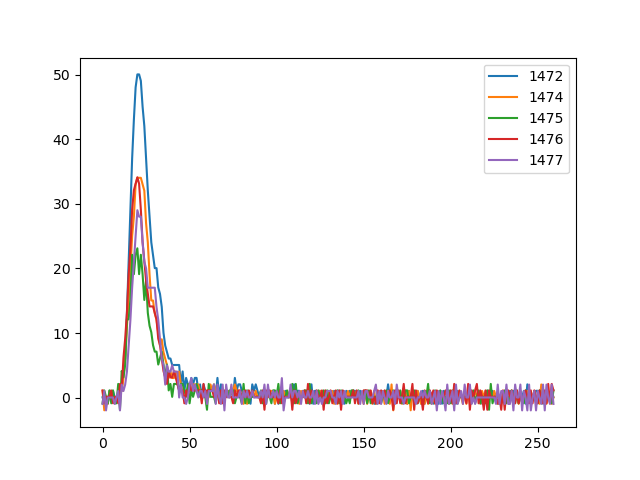

In [117]:
%matplotlib widget
dfAlignedPulses.iloc[1050:1055, :reducedPulseLength].T.plot()
plt.show()

## Clustering based on horizontal line

### Aligned pulses FOM

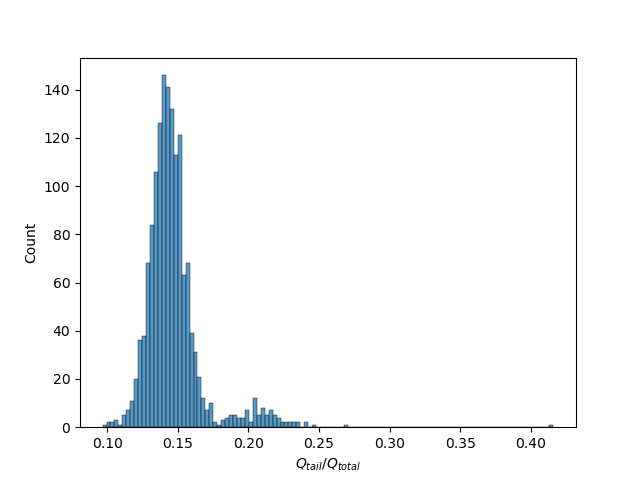

In [118]:

separationAreaValue = 1100
separationFOMValue = 0.18

%matplotlib widget
poi = dfAlignedPulses.loc[dfAlignedPulses["Area"] > separationAreaValue]
sns.histplot(data = poi, x = "FOM")
plt.xlabel('$Q_{tail}/Q_{total}$')

plt.show()

### Aligned pulses FOM after filtering out low-energy events

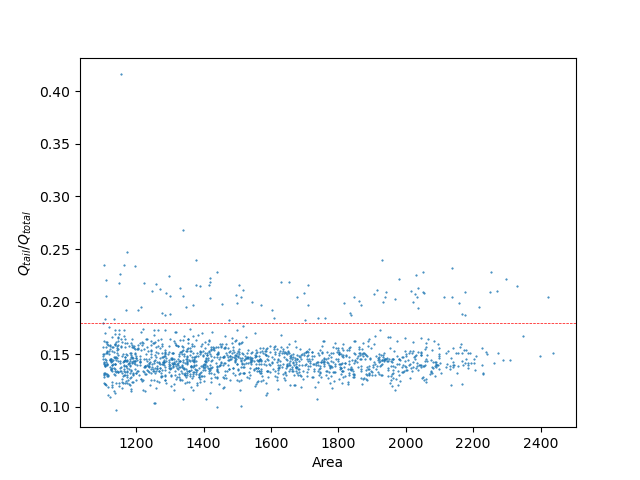

In [119]:
%matplotlib widget

plt.plot(poi["Area"], poi["FOM"], '.', markersize = 1)
plt.axhline(y = separationFOMValue, color='r', linestyle='--', linewidth = 0.5)
plt.xlabel('Area')
plt.ylabel('$Q_{tail}/Q_{total}$')
plt.show()

### Analyzing individual clusters

[]

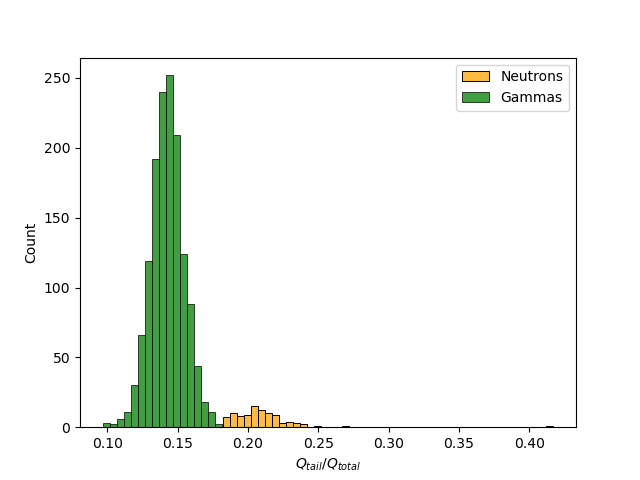

In [120]:
dfNeutrons = dfAlignedPulses.loc[((dfAlignedPulses["Area"] > separationAreaValue) & (dfAlignedPulses["FOM"] > separationFOMValue))]
dfGammas = dfAlignedPulses.loc[((dfAlignedPulses["Area"] > separationAreaValue) & (dfAlignedPulses["FOM"] <= separationFOMValue))]

dfGammas.to_csv("./data/output/gammas.csv")
dfNeutrons.to_csv("./data/output/neutrons.csv")


%matplotlib widget

sns.histplot(dfNeutrons["FOM"], binwidth = 0.005, color = 'orange')
sns.histplot(dfGammas["FOM"].iloc[:], binwidth = 0.005, color = 'green')
plt.xlabel('$Q_{tail}/Q_{total}$')
plt.legend(["Neutrons", "Gammas"])

plt.plot()

Analyzing a balanced dataset

[]

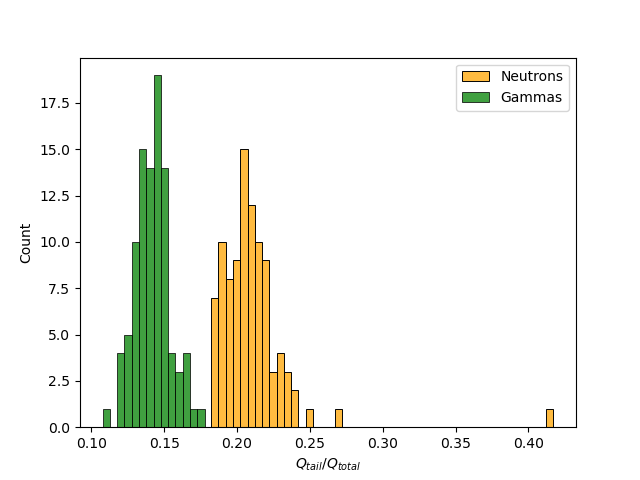

In [121]:
%matplotlib widget

sns.histplot(dfNeutrons["FOM"], binwidth = 0.005, color = 'orange')
sns.histplot(dfGammas["FOM"].iloc[:95], binwidth = 0.005, color = 'green')
plt.legend(["Neutrons", "Gammas"])
plt.xlabel('$Q_{tail}/Q_{total}$')

plt.plot()

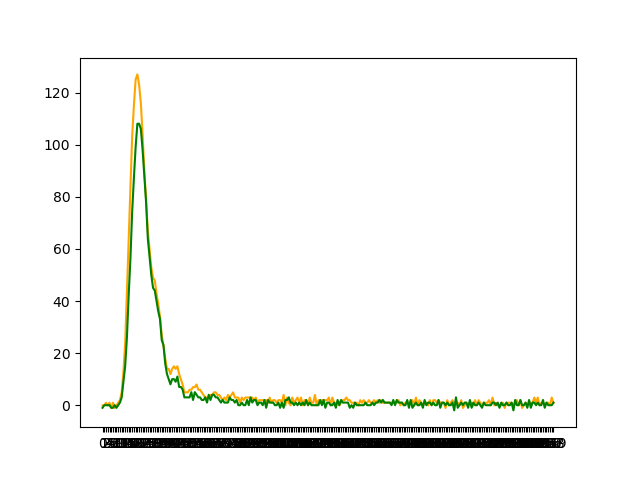

In [122]:
%matplotlib widget
plt.plot(dfNeutrons.iloc[11:12,:reducedPulseLength].T, color = 'orange')
plt.plot(dfGammas.iloc[12:13,:reducedPulseLength].T, color = 'green')
plt.show()

## Clustering based on higher-order separation function

In [123]:
def linearizationFunction(x, a, b, c):
    return a*(x**2) + b*x + c


def linearizationFunction2(x, a, b):
    return a*x + b

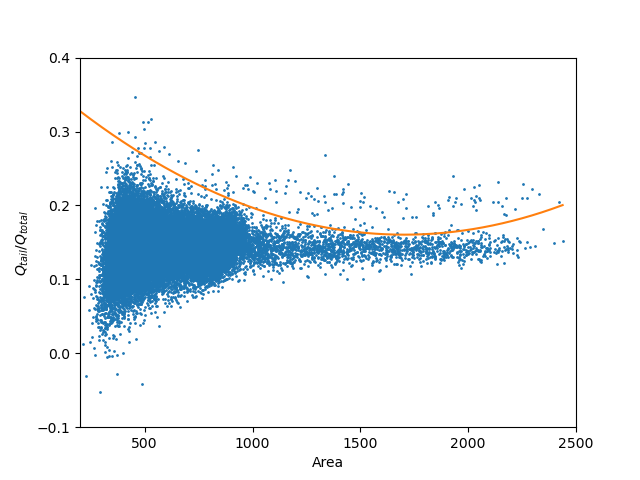

In [124]:
# Linearization parameters
a = 7.4e-8
b = -2.52e-4
c = 0.375

linX = np.linspace(dfAlignedPulses["Area"].min(), dfAlignedPulses["Area"].max(), len(dfAlignedPulses["Area"]))
linY = linearizationFunction(linX, a, b, c)

%matplotlib widget
plt.plot(dfAlignedPulses["Area"], dfAlignedPulses["FOM"], '.', markersize = 2)
# g = sns.JointGrid(x = dfAlignedPulses["Area"], y = dfAlignedPulses["FOM"], space = 0)
# g.plot_joint(sns.kdeplot, fill=True, clip=((0, 2000), (0, 0.5)),
#              thresh=0, levels=1000, cmap="light:b")

plt.plot(linX, linY)

plt.xlabel('Area')
plt.ylabel('$Q_{tail}/Q_{total}$')

plt.xlim(200, 2500)
plt.ylim(-0.1, 0.4)

plt.show()

In [125]:
dfAlignedPulsesLinearized = dfAlignedPulses.copy()
dfAlignedPulsesLinearized["DividingCurve"] = dfAlignedPulsesLinearized["Area"].apply(linearizationFunction, args =(a, b, c))
dfAlignedPulsesLinearized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36832 entries, 0 to 51397
Columns: 265 entries, 0 to DividingCurve
dtypes: float64(265)
memory usage: 74.7 MB


### Analyzing individual clusters

In [126]:
dfNewNeutrons = dfAlignedPulses.loc[dfAlignedPulsesLinearized["FOM"] > dfAlignedPulsesLinearized["DividingCurve"]]
dfNewGammas = dfAlignedPulses.loc[dfAlignedPulsesLinearized["FOM"] <= dfAlignedPulsesLinearized["DividingCurve"]]

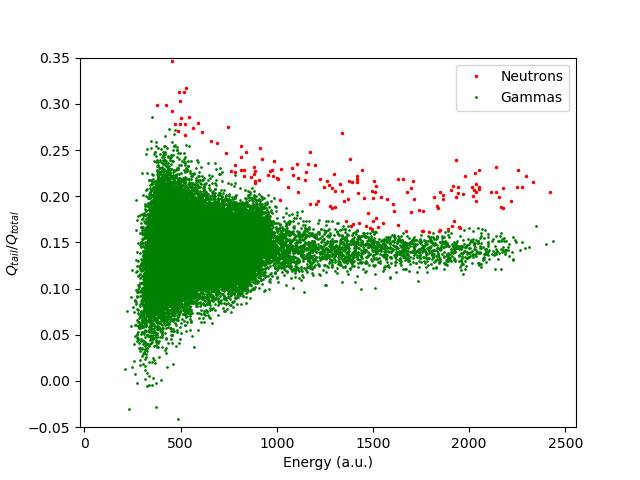

In [130]:
%matplotlib widget
plt.plot(dfNewNeutrons["Area"], dfNewNeutrons["FOM"], '.', color = 'red', markersize = 3)
plt.plot(dfNewGammas["Area"], dfNewGammas["FOM"], '.', color = 'green', markersize = 2)
plt.legend(["Neutrons", "Gammas"])
plt.xlabel("Energy (a.u.)")
plt.ylabel("$Q_{tail}/Q_{total}$")
plt.ylim(-0.05, 0.35)
plt.show()

In [48]:
dfNewNeutrons.info()
dfNewGammas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 106 to 51274
Columns: 264 entries, 0 to FOM
dtypes: float64(264)
memory usage: 347.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36664 entries, 0 to 51397
Columns: 264 entries, 0 to FOM
dtypes: float64(264)
memory usage: 74.1 MB


In [49]:
dfNewNeutrons.to_csv('./data/output/neutronsCurveCluster.csv')
dfNewGammas.to_csv('./data/output/gammasCurveCluster.csv')

In [50]:
dfAlignedPulsesLinearized[["Area", "DividingCurve"]]

Area  DividingCurve
0      782.3333       0.223143
5      628.6667       0.245822
10     374.0000       0.291103
11     892.3333       0.209055
12     754.3333       0.227015
...         ...            ...
51393  437.0000       0.279008
51394  471.6666       0.272603
51395  838.0000       0.215790
51396  409.3334       0.284247
51397  765.6667       0.225434

[36832 rows x 2 columns]

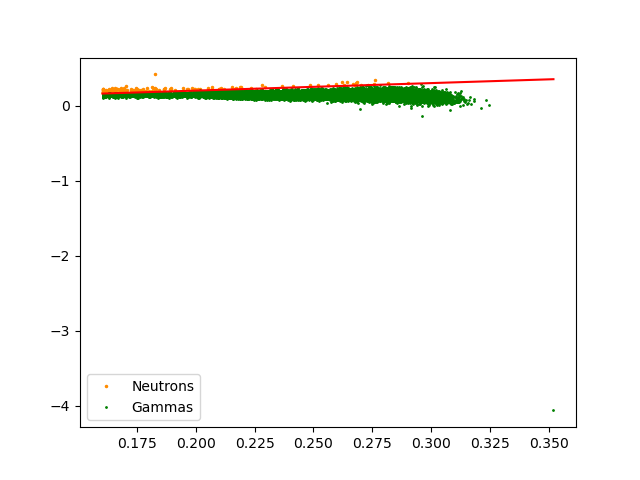

In [51]:
d = 1
e = 0
linX2 = np.linspace(dfAlignedPulsesLinearized["DividingCurve"].min(), dfAlignedPulsesLinearized["DividingCurve"].max(), len(dfAlignedPulsesLinearized["DividingCurve"]))
linY2 = linearizationFunction2(linX2, d, e)


%matplotlib widget
plt.plot(dfAlignedPulsesLinearized["DividingCurve"].loc[dfNewNeutrons.index], dfAlignedPulsesLinearized["FOM"].loc[dfNewNeutrons.index], '.', color = 'darkorange', markersize = 3)
plt.plot(dfAlignedPulsesLinearized["DividingCurve"].loc[dfNewGammas.index], dfAlignedPulsesLinearized["FOM"].loc[dfNewGammas.index], '.', color = 'green', markersize = 2)
plt.plot(linX2, linY2, color = 'red')
plt.legend(["Neutrons", "Gammas"])


plt.show()

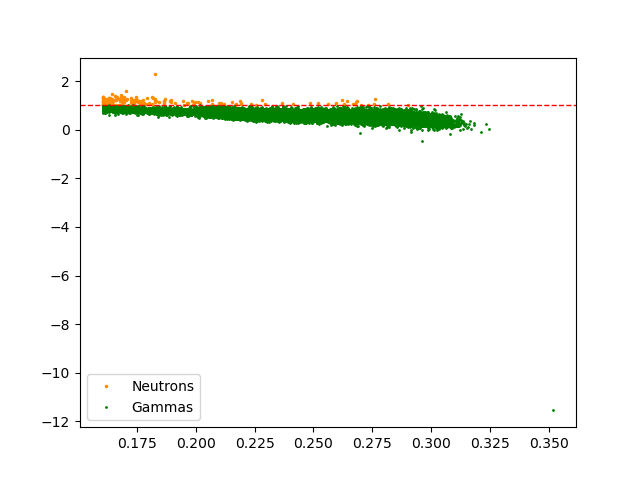

In [54]:
dfAlignedPulsesLinearized["FOM2"] = dfAlignedPulsesLinearized["FOM"]/dfAlignedPulsesLinearized["DividingCurve"]

%matplotlib widget
plt.plot(dfAlignedPulsesLinearized["DividingCurve"].loc[dfNewNeutrons.index], dfAlignedPulsesLinearized["FOM2"].loc[dfNewNeutrons.index], '.', color = 'darkorange', markersize = 3)
plt.plot(dfAlignedPulsesLinearized["DividingCurve"].loc[dfNewGammas.index], dfAlignedPulsesLinearized["FOM2"].loc[dfNewGammas.index], '.', color = 'green', markersize = 2)
plt.legend(["Neutrons", "Gammas"])

plt.axhline(y = 1, color='r', linestyle='--', linewidth = 1)


plt.show()


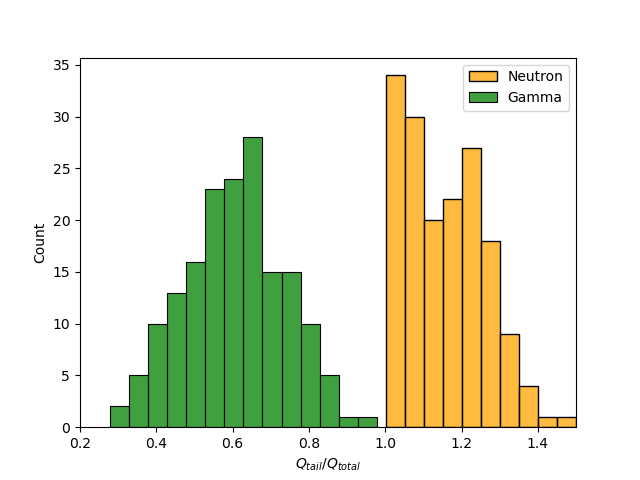

In [55]:
# FOM
%matplotlib widget
sns.histplot(dfAlignedPulsesLinearized["FOM2"].loc[dfNewNeutrons.index], binwidth = 0.05, color = 'orange')
sns.histplot(dfAlignedPulsesLinearized["FOM2"].loc[dfNewGammas.index].iloc[:len(dfNewNeutrons["FOM"])*1], binwidth = 0.05, color = 'green')

plt.xlim([0.2, 1.5])
# plt.ylim([0, 5500])

plt.legend(["Neutron", "Gamma"])

plt.xlabel('$Q_{tail}/Q_{total}$')

plt.show()

## Fitting gaussian models to quantify FOM

### Choosing the required dataset. 
It can be either the horizontally-separated cluster, or the higher-order function one

In [62]:
'''
(Un)comment two of the following lines to choose the data to be used
'''

'''Cluster based on higher-order function separation. High- and low-energy events included'''
dfNeutrons = pd.read_csv('./data/output/neutronsCurveCluster.csv', index_col = 0)
dfGammas = pd.read_csv('./data/output/gammasCurveCluster.csv', index_col = 0)


'''Cluster based on simple horizontal line separation. Only high-energy events are included'''
# dfNeutrons = pd.read_csv('./data/output/neutrons.csv', index_col = 0)
# dfGammas = pd.read_csv('./data/output/gammas.csv', index_col = 0)


'Cluster based on simple horizontal line separation. Only high-energy events are included'

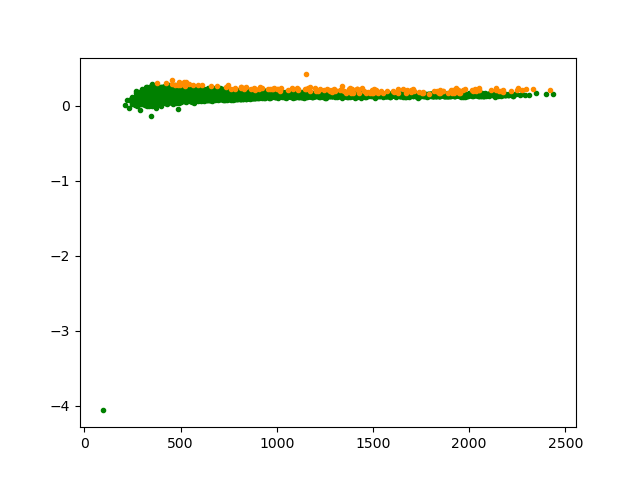

In [65]:
%matplotlib widget

plt.plot(dfGammas["Area"], dfGammas["FOM"], '.', color = "green")
plt.plot(dfNeutrons["Area"], dfNeutrons["FOM"], '.', color = "darkorange")
plt.show()

### Fitting

In [71]:
from scipy.stats import norm
from statistics import NormalDist
from sklearn.linear_model import LinearRegression

xScale = 10000


def computeNumberOfBins(dataLen, algorithm = 0):
    
    # D'Agostini and Stephens method
    if algorithm == 0:
        return int(2*dataLen**(2/5))
    
    
    # Sturge's rule
    elif algorithm == 1:
        return int(1 + np.log(dataLen)/np.log(2))

Gamma distribution

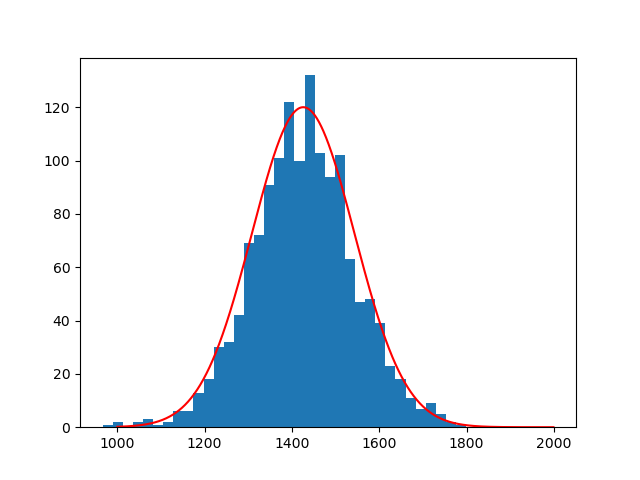

In [72]:
# Visualization of the distribution
%matplotlib widget


nBinsGamma = computeNumberOfBins(len(dfGammas), 0)

dfGammasRescaled = (dfGammas["FOM"]*xScale).astype(int)

histDataGamma = plt.hist(dfGammasRescaled, bins = nBinsGamma, histtype = 'stepfilled')


edgeCuts = int(0.1*xScale)
roiGamma = (np.array([0, 0.3])*xScale).astype(int)
denormalization = 120
startingPointGammasMean = np.average(dfGammasRescaled)
startingPointGammasSD = np.std(dfGammasRescaled)


pdfGammaX = range(roiGamma[0]+edgeCuts, roiGamma[1]-edgeCuts)
pdfGammaY = norm.pdf(pdfGammaX, startingPointGammasMean, startingPointGammasSD)
pdfGammaY /= max(pdfGammaY)
plt.plot(pdfGammaX, pdfGammaY*denormalization, 'r')
plt.show()

In [73]:
normDistGammas = NormalDist.from_samples(dfGammasRescaled)

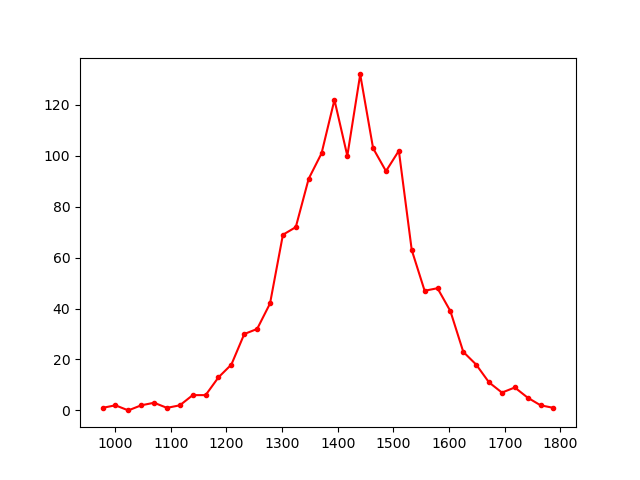

In [74]:
# Gaussian fit
histGammaX = histDataGamma[1][:-1]
histGammaY = histDataGamma[0]

# Aligning to center
histGammaX += (histGammaX[1] - histGammaX[0])/2

%matplotlib widget
plt.plot(histGammaX, histGammaY, 'r.-')
plt.show()

In [75]:
from scipy.optimize import curve_fit

# Gaussian model
def gaussianFunc(x, mu, sd):
    return (1/(sd*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2)/(2*sd**2))

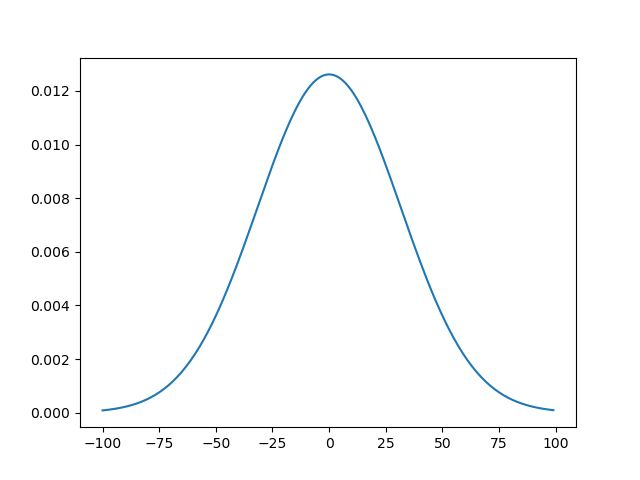

In [76]:
# Verifying the model behavior before fitting
xF = range(-100, 100, 1)
yF = [0]*len(xF)

for i in range(len(xF)):
    yF[i] = gaussianFunc(xF[i], 0, 100/np.sqrt(10))
    

%matplotlib widget
plt.plot(xF, yF)
plt.show()

Fitting model for Gammas

In [77]:
#Using least-squares method
popt, pcov = curve_fit(gaussianFunc, histGammaX, histGammaY, bounds = ([roiGamma[0], normDistGammas.stdev - 10], [roiGamma[1], normDistGammas.stdev + 10]))

distMeanGamma, distSDGamma = popt
distErrorFitGamma = np.sqrt(np.diag(pcov))

In [78]:
distMeanGamma

1424.905796748103

In [79]:
distSDGamma

107.48337797350759

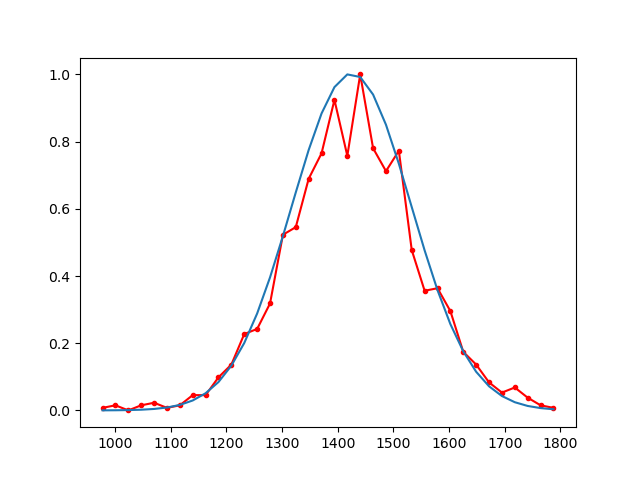

In [80]:
histFitGamma = []
for i in histGammaX:
    histFitGamma.append(max(histGammaY)*gaussianFunc(i, distMeanGamma, distSDGamma))

%matplotlib widget
plt.plot(histGammaX, histGammaY/max(histGammaY), 'r.-')
plt.plot(histGammaX, histFitGamma/max(histFitGamma))
plt.show()

Neutron distribution

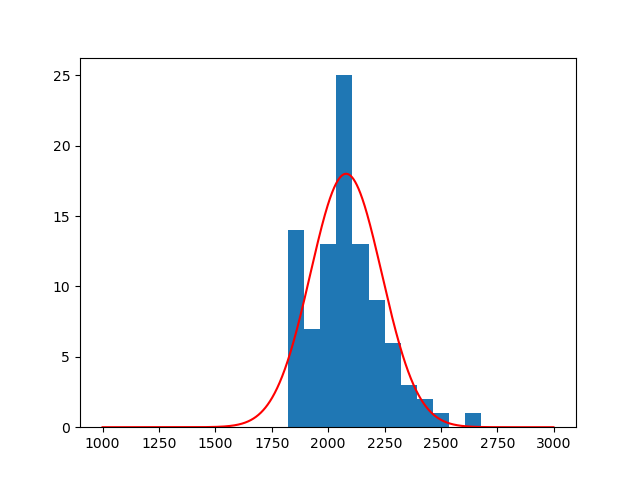

In [81]:
# Visualization of the distribution
%matplotlib widget


nBinsNeutrons = computeNumberOfBins(len(dfNeutrons), 0)

dfNeutronsRescaled = (dfNeutrons["FOM"]*xScale).astype(int)
dfNeutronsRescaled = dfNeutronsRescaled[((dfNeutronsRescaled < 4000) & (dfNeutronsRescaled > 1000))]

histDataNeutrons = plt.hist(dfNeutronsRescaled, bins = nBinsNeutrons, histtype = 'stepfilled')

denormalization = 18

edgeCuts = int(0.0*xScale)
roiNeutrons = (np.array([0.1, 0.3])*xScale).astype(int)
startingPointNeutronsMean = np.average(dfNeutronsRescaled)
startingPointNeutronsSD = np.std(dfNeutronsRescaled)


pdfNeutronsX = range(roiNeutrons[0]+edgeCuts, roiNeutrons[1]-edgeCuts)
pdfNeutronsY = norm.pdf(pdfNeutronsX, startingPointNeutronsMean, startingPointNeutronsSD)
pdfNeutronsY /= max(pdfNeutronsY)
plt.plot(pdfNeutronsX, pdfNeutronsY*denormalization, 'r')
plt.show()

In [82]:
normDistNeutrons = NormalDist.from_samples(dfNeutronsRescaled)

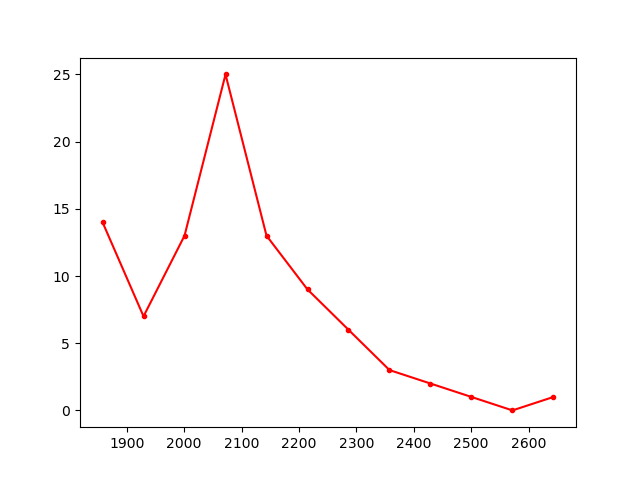

In [83]:
# Gaussian fit
histNeutronX = histDataNeutrons[1][:-1]
histNeutronY = histDataNeutrons[0]

# Aligning to center
histNeutronX += (histNeutronX[1] - histNeutronX[0])/2

%matplotlib widget
plt.plot(histNeutronX, histNeutronY, 'r.-')
plt.show()

In [84]:
from scipy.optimize import curve_fit

# Gaussian model
def gaussianFunc(x, mu, sd):
    return (1/(sd*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2)/(2*sd**2))

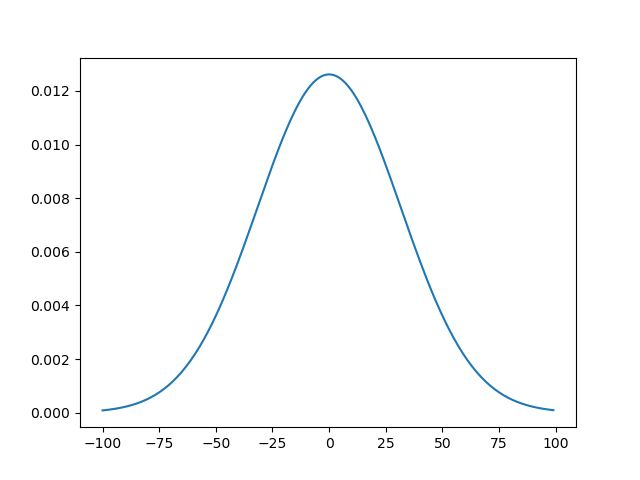

In [85]:
# Verifying the model behavior before fitting
xF = range(-100, 100, 1)
yF = [0]*len(xF)

for i in range(len(xF)):
    yF[i] = gaussianFunc(xF[i], 0, 100/np.sqrt(10))
    

%matplotlib widget
plt.plot(xF, yF)
plt.show()

Fitting model for Gammas

In [86]:
#Using least-squares method
popt, pcov = curve_fit(gaussianFunc, histNeutronX, histNeutronY, bounds = ([roiNeutrons[0], normDistNeutrons.stdev - 10], [roiNeutrons[1], normDistNeutrons.stdev + 10]))

distMeanNeutron, distSDNeutron = popt
distErrorFitNeutron = np.sqrt(np.diag(pcov))

In [87]:
distMeanNeutron

2064.128991578021

In [88]:
distSDNeutron

148.94291531991877

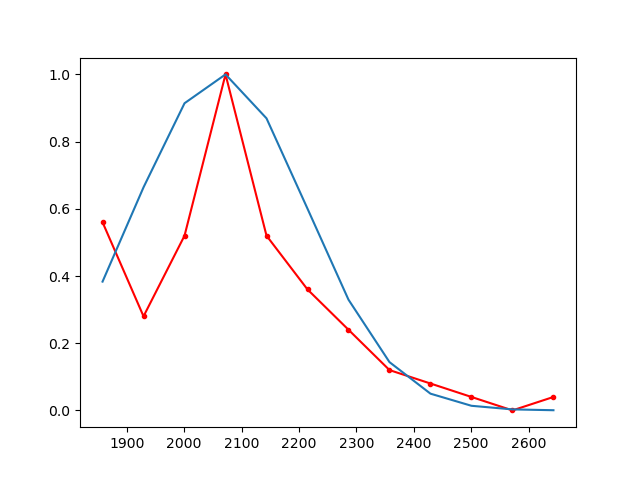

In [89]:
histFitNeutron = []
for i in histNeutronX:
    histFitNeutron.append(max(histNeutronY)*gaussianFunc(i, distMeanNeutron, distSDNeutron))

%matplotlib widget
plt.plot(histNeutronX, histNeutronY/max(histNeutronY), 'r.-')
plt.plot(histNeutronX, histFitNeutron/max(histFitNeutron))
plt.show()

## Quantifying FOM 

In [90]:
# Loading individual datasets

# Not used anymore: datasets already loaded

dfGammas = pd.read_csv("./data/output/gammas.csv", index_col = 0)
dfNeutrons = pd.read_csv("data/output/neutrons.csv", index_col = 0)

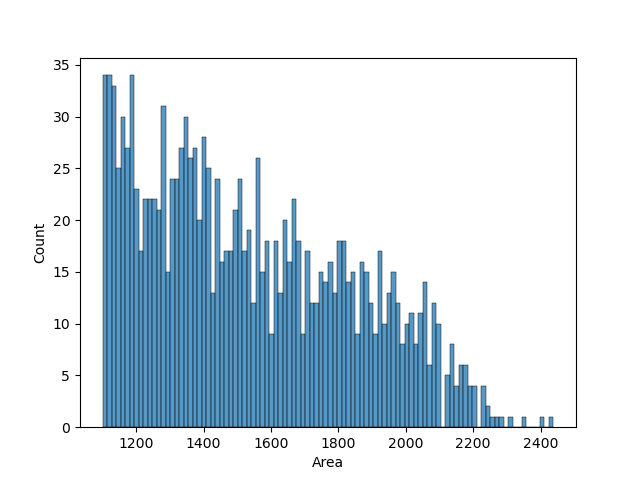

In [91]:
%matplotlib widget

len(dfGammas)

sns.histplot(dfGammas["Area"], bins = 100)
plt.show()

<ipython-input-92-de5ae0673fde>:24: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fc3bbd154f0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend([ "_", "_", "Neutron", "Gamma"])
<ipython-input-92-de5ae0673fde>:24: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fc3bbd15160> has a label of '_' which cannot be automatically added to the legend.
  plt.legend([ "_", "_", "Neutron", "Gamma"])


[]

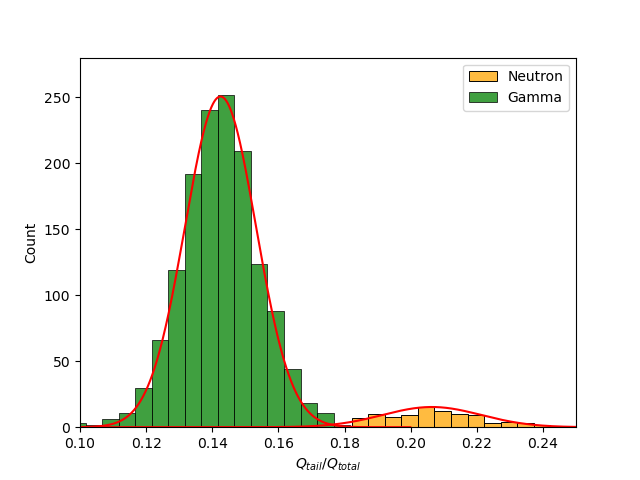

In [92]:
%matplotlib widget

# FOM
sns.histplot(dfNeutrons["FOM"], binwidth = 0.005, color = 'orange')
sns.histplot(dfGammas["FOM"], binwidth = 0.005, color = 'green')

# Plotting quantified distributions over actual data

# Gamma
pdfGammaX_2 = np.array(pdfGammaX)/xScale
pdfGammaY_2 = np.array(norm.pdf(pdfGammaX_2, distMeanGamma/xScale, distSDGamma/xScale))
plt.plot(pdfGammaX_2, pdfGammaY_2*6.75, 'red')

# Neutrons
pdfNeutronsX_2 = np.array(pdfNeutronsX)/xScale
pdfNeutronsY_2 = np.array(norm.pdf(pdfNeutronsX_2, distMeanNeutron/xScale, distSDNeutron/xScale))
plt.plot(pdfNeutronsX_2, pdfNeutronsY_2/1.75, 'red')



plt.xlim([0.1, 0.25])
plt.ylim([0, 280])

plt.legend([ "_", "_", "Neutron", "Gamma"])

plt.xlabel('$Q_{tail}/Q_{total}$')

plt.plot()

In [94]:
# FOM = S / (sigma_neutron + sigma_gamma)

# 3-sigma separation --> S >= 3*(sigma_neutron + sigma_gamma)
minimumFOM = 3*(distSDNeutron + distSDGamma)/(distSDNeutron + distSDGamma)
minimumFOM

3.0

In [95]:
FOM = abs(distMeanGamma - distMeanNeutron)/(distSDGamma + distSDNeutron)
FOM

2.4928145496314635

In [96]:
errorFitGamma = (distErrorFitGamma/xScale)[1]/distSDGamma
errorFitGamma

0.6332705175328069

In [97]:
errorFitNeutron = (distErrorFitNeutron/xScale)[1]/distSDNeutron
errorFitNeutron

0.2755254161718389

In [98]:
errorFitAvg = (errorFitGamma + errorFitNeutron)/2
errorFitAvg

0.4543979668523229

In [99]:
FWHM_TO_STD = 2*np.sqrt(2*np.log(2))
deltaFOM = np.sqrt((errorFitAvg*FWHM_TO_STD/(distSDGamma+distSDNeutron))**2*(2+4*(abs(distMeanGamma - distMeanNeutron)*FWHM_TO_STD/(distSDGamma+distSDNeutron))**2))
deltaFOM

0.04934435279166059

Minimum FOM accomplished?

In [100]:
# Is FOM enough?
FOM >= minimumFOM

False

# Computing pulse pattern based on average pulse-shape

### Gamma pulse pattern

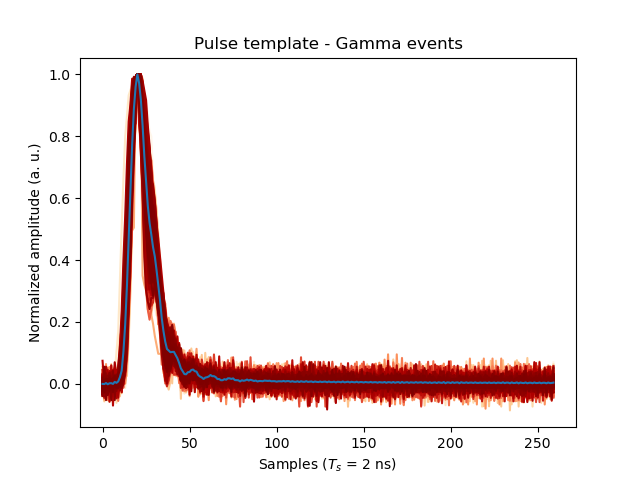

In [103]:
# Normalizing pulse amplitudes
# dfTemplateGamma = dfGammas.iloc[:95].copy()

dfTemplateGamma = dfGammas.iloc[:].copy()


dfTemplateGamma["PeakValue"] = dfTemplateGamma[dfTemplateGamma.columns[:reducedPulseLength]].max(axis = 1)
dfTemplateGamma.iloc[:,:reducedPulseLength] = dfTemplateGamma.iloc[:,:reducedPulseLength].div(dfTemplateGamma["PeakValue"].values, axis = 0)

# Computing average pulse waveform
dfTemplateGamma = dfTemplateGamma.T
dfTemplateGamma["AvgPulse"] = dfTemplateGamma.mean(axis = 1)
dfTemplateGamma = dfTemplateGamma.T

%matplotlib widget
dfTemplateGamma.iloc[:-1, :reducedPulseLength].T.plot(colormap = "OrRd", legend = None)
plt.plot(dfTemplateGamma.columns[:reducedPulseLength], dfTemplateGamma.loc["AvgPulse"][:reducedPulseLength])

plt.title("Pulse template - Gamma events")
plt.xlabel("Samples ($T_s$ = 2 ns)")
plt.ylabel("Normalized amplitude (a. u.)")

plt.show()

### Neutrons pulse pattern

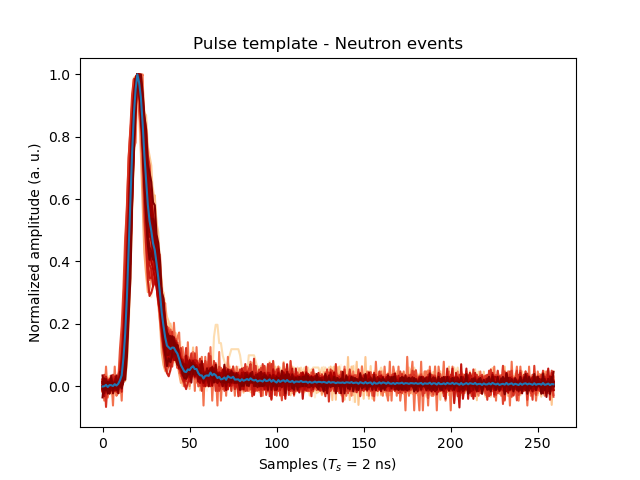

In [102]:
# Normalizing pulse amplitudes
dfTemplateNeutrons = dfNeutrons.copy()

dfTemplateNeutrons["PeakValue"] = dfTemplateNeutrons[dfTemplateNeutrons.columns[:reducedPulseLength]].max(axis = 1)
dfTemplateNeutrons.iloc[:,:reducedPulseLength] = dfTemplateNeutrons.iloc[:,:reducedPulseLength].div(dfTemplateNeutrons["PeakValue"].values, axis = 0)

# Computing average pulse waveform
dfTemplateNeutrons = dfTemplateNeutrons.T
dfTemplateNeutrons["AvgPulse"] = dfTemplateNeutrons.mean(axis = 1)
dfTemplateNeutrons = dfTemplateNeutrons.T

%matplotlib widget
dfTemplateNeutrons.iloc[:-1, :reducedPulseLength].T.plot(colormap = "OrRd", legend = None)
plt.plot(dfTemplateNeutrons.columns[:reducedPulseLength], dfTemplateNeutrons.loc["AvgPulse"][:reducedPulseLength])

plt.title("Pulse template - Neutron events")
plt.xlabel("Samples ($T_s$ = 2 ns)")
plt.ylabel("Normalized amplitude (a. u.)")

plt.show()

### Noise analysis (for further ADC LSB resolution estimation)

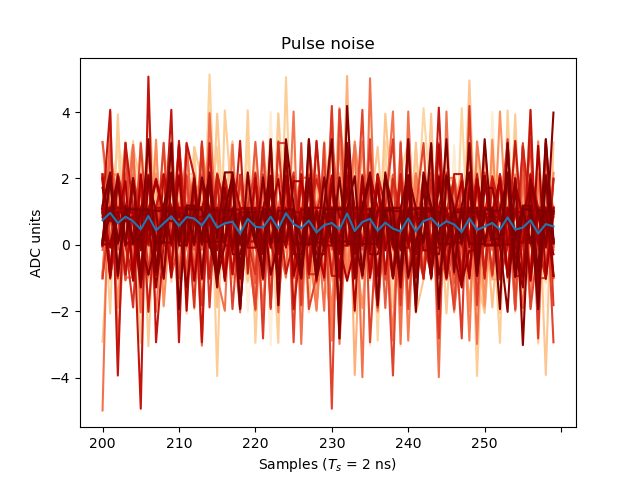

In [104]:
# Normalizing pulse amplitudes
dfNoiseAnalysis = dfNeutrons.copy()

# Computing average pulse waveform
dfNoiseAnalysis = dfNoiseAnalysis.T
dfNoiseAnalysis["AvgPulse"] = dfNoiseAnalysis.mean(axis = 1)
dfNoiseAnalysis = dfNoiseAnalysis.T

noiseStartingSample = 200

%matplotlib widget
dfNoiseAnalysis.iloc[:-1, noiseStartingSample:reducedPulseLength].T.plot(colormap = "OrRd", legend = None)
plt.plot(dfNoiseAnalysis.columns[noiseStartingSample:reducedPulseLength], dfNoiseAnalysis.loc["AvgPulse"][noiseStartingSample:reducedPulseLength])

plt.title("Pulse noise")
plt.xlabel("Samples ($T_s$ = 2 ns)")
plt.ylabel("ADC units")
plt.show()

### Pulse templates (patterns) comparison

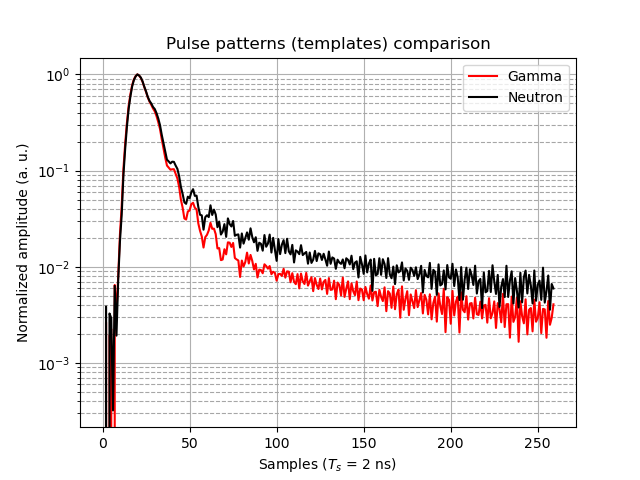

In [133]:
%matplotlib widget

ax = dfTemplateGamma.loc["AvgPulse"][:reducedPulseLength].T.plot(color = 'red')
dfTemplateNeutrons.loc["AvgPulse"][:reducedPulseLength].T.plot(ax = ax, color = 'black')
plt.legend(["Gamma", "Neutron"])

plt.title("Pulse patterns (templates) comparison")
plt.xlabel("Samples ($T_s$ = 2 ns)")
plt.ylabel("Normalized amplitude (a. u.)")

ax.set_yscale('log')
matplotlib.pyplot.grid(True, which="both")
plt.grid(True, which="minor", ls="--", color='0.65')

plt.show()

## Finding same-energy pulses
### Coming from different events

In [107]:
#List of energy (area) values that are repeated within the dataset
duplicatedAreaValues = dfAlignedPulses[dfAlignedPulses["Area"].duplicated()]["Area"].unique()
len(duplicatedAreaValues)

NameError: name 'dfAlignedPulses' is not defined

Testing with some duplicated area values from the previoius list 

In [95]:
exampleAreaIndex = 1000

dfDup = dfAlignedPulses[dfAlignedPulses["Area"] == duplicatedAreaValues[exampleAreaIndex]]
dfDup = dfDup.iloc[:,:reducedPulseLength]
print("Area value: " + str(duplicatedAreaValues[exampleAreaIndex]))
print("Number of occurrences: " + str(len(dfDup)))

Area value: 812.0
Number of occurrences: 20


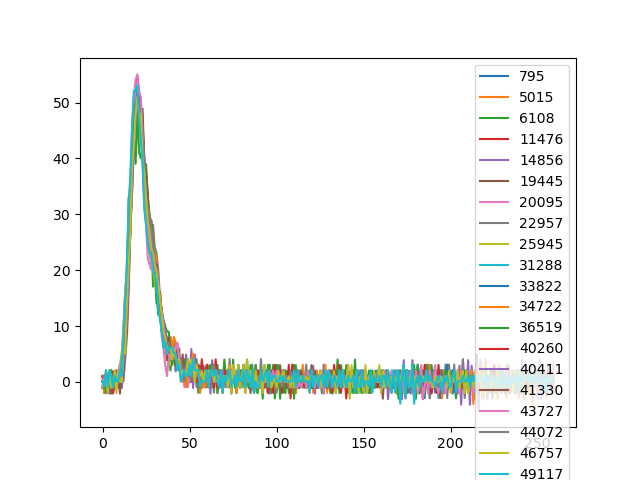

In [96]:
%matplotlib widget
dfDup.T.plot()
plt.show()

## Normalizing pulses 
### To manually check pulse shape

In [108]:
dfNormalizedPulses = dfAlignedPulses.copy()
dfNormalizedPulses["PeakValue"] = dfAlignedPulses[dfAlignedPulses.columns[:reducedPulseLength]].max(axis = 1)

# Dividing the sample values by its max amplitude -> Normalizing
dfNormalizedPulses.iloc[:,:reducedPulseLength] = dfNormalizedPulses.iloc[:,:reducedPulseLength].div(dfNormalizedPulses["PeakValue"].values, axis = 0)

dfNormalizedPulses = dfNormalizedPulses.astype('float32')
dfNormalizedPulses

NameError: name 'dfAlignedPulses' is not defined

In [98]:
dfNormalizedPulses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36832 entries, 0 to 51397
Columns: 265 entries, 0 to PeakValue
dtypes: float32(265)
memory usage: 38.5 MB


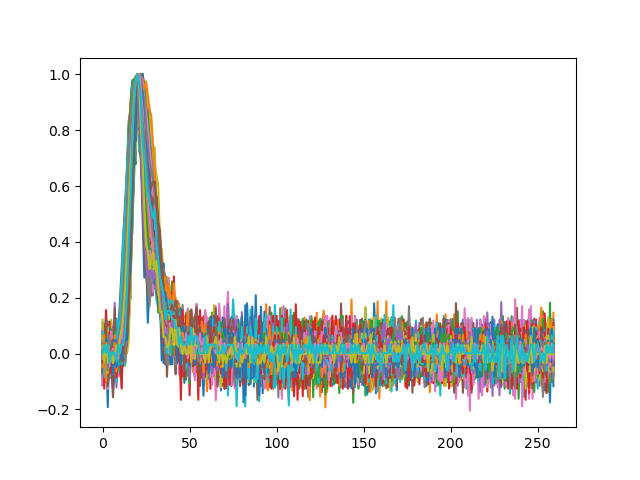

In [99]:
%matplotlib widget
dfNormalizedPulses.iloc[1000:2000,:reducedPulseLength].T.plot(legend = None)
plt.show()

#### Computing features for normalized pulses

In [100]:
dfNormalizedPulses["Area"] = dfNormalizedPulses[dfNormalizedPulses.columns[:reducedPulseLength]].sum(axis = 1)
dfNormalizedPulses["leadingArea"] = dfNormalizedPulses[dfNormalizedPulses.columns[:hardTailIntegrationLimit]].sum(axis = 1)
dfNormalizedPulses["trailingArea"] = dfNormalizedPulses[dfNormalizedPulses.columns[hardTailIntegrationLimit:reducedPulseLength]].sum(axis = 1)
dfNormalizedPulses

0         1         2         3         4         5         6  \
0      0.042120 -0.039401  0.021740  0.021740 -0.019021  0.021740 -0.039401   
5     -0.025428  0.024593 -0.025428  0.024593  0.024593 -0.000418  0.024593   
10    -0.001927 -0.001927 -0.001927 -0.001927 -0.001927 -0.001927 -0.040462   
11     0.002968 -0.014836  0.020772 -0.014836  0.038576 -0.014836  0.002968   
12     0.002376  0.002376 -0.017984  0.002376  0.002376  0.022736 -0.017984   
...         ...       ...       ...       ...       ...       ...       ...   
51393  0.037037  0.000000  0.000000  0.000000  0.000000  0.000000  0.037037   
51394  0.066389 -0.089213  0.004148  0.004148  0.035269  0.035269 -0.026972   
51395  0.001848  0.001848  0.001848 -0.016636  0.001848 -0.016636  0.020333   
51396  0.005048  0.005048  0.005048  0.005048  0.005048  0.005048 -0.081469   
51397  0.000708 -0.020554  0.021970 -0.041815  0.021970 -0.020554  0.000708   

              7         8         9  ...       255       256       257  \
0      0.001359  0.021740 -0.039401  ...  0.001359  0.021740  0.001359   
5      0.024593 -0.025428  0.049603  ... -0.000418 -0.000418 -0.025428   
10     0.036609 -0.040462 -0.001927  ...  0.036609 -0.001927  0.036609   
11    -0.014836  0.002968  0.020772  ... -0.014836  0.002968  0.002968   
12     0.043095  0.002376  0.002376  ...  0.022736 -0.017984  0.022736   
...         ...       ...       ...  ...       ...       ...       ...   
51393  0.000000  0.037037  0.000000  ... -0.037037  0.037037 -0.037037   
51394  0.004148  0.004148 -0.026972  ... -0.026972  0.004148  0.004148   
51395  0.001848  0.001848  0.020333  ... -0.035120  0.038817 -0.016636   
51396  0.048307  0.005048  0.048307  ...  0.048307  0.005048  0.048307   
51397  0.021970  0.000708  0.000708  ... -0.041815  0.043231 -0.041815   

            258       259       Area  leadingArea  trailingArea     FOM  \
0      0.001359  0.001359  15.944446     4.347837     11.596608  0.1657   
5     -0.000418 -0.000418  15.723002     4.493526     11.229476  0.1612   
10     0.036609 -0.001927  14.412360     4.238921     10.173438  0.1043   
11     0.020772  0.002968  15.887359     5.418406     10.468952  0.1610   
12     0.002376  0.022736  15.358144     3.203269     12.154877  0.1653   
...         ...       ...        ...          ...           ...     ...   
51393  0.000000  0.000000  16.185175     4.814815     11.370361  0.1396   
51394  0.004148  0.004148  14.678199     3.786290     10.891906  0.1449   
51395  0.020333  0.020333  15.489791     4.177449     11.312343  0.1611   
51396  0.005048  0.048307  17.707724     3.561668     14.146024  0.1922   
51397  0.000708  0.021970  16.279028     4.649174     11.629872  0.1337   

       PeakValue  
0      49.066700  
5      39.983299  
10     25.950001  
11     56.166698  
12     49.116699  
...          ...  
51393  27.000000  
51394  32.133301  
51395  54.099998  
51396  23.116699  
51397  47.033298  

[36832 rows x 265 columns]

In [109]:
dfNormalizedPulses["FOM"] = (dfNormalizedPulses["Area"] - dfNormalizedPulses["leadingArea"]) / dfNormalizedPulses["Area"]

# Rounding to optimize representation
roundingDecimals_AlignedNormalized = 8

# dfNormalizedPulses = dfNormalizedPulses.astype('float32')
dfNormalizedPulses = dfNormalizedPulses.round(decimals = roundingDecimals_AlignedNormalized)
dfNormalizedPulses.to_csv('./data/output/normalizedAlignedPulses.csv')
dfNormalizedPulses

NameError: name 'dfNormalizedPulses' is not defined

### Analyzing normalized + aligned pulses

In [110]:
dfNormalizedPulses = pd.read_csv('./data/output/normalizedAlignedPulses.csv', index_col = 0)
dfNormalizedPulses

0         1         2         3         4         5         6  \
0      0.042120 -0.039401  0.021740  0.021740 -0.019021  0.021740 -0.039401   
5     -0.025428  0.024593 -0.025428  0.024593  0.024593 -0.000418  0.024593   
10    -0.001927 -0.001927 -0.001927 -0.001927 -0.001927 -0.001927 -0.040462   
11     0.002968 -0.014836  0.020772 -0.014836  0.038576 -0.014836  0.002968   
12     0.002376  0.002376 -0.017984  0.002376  0.002376  0.022736 -0.017984   
...         ...       ...       ...       ...       ...       ...       ...   
51393  0.037037  0.000000  0.000000  0.000000  0.000000  0.000000  0.037037   
51394  0.066389 -0.089213  0.004148  0.004148  0.035269  0.035269 -0.026972   
51395  0.001848  0.001848  0.001848 -0.016636  0.001848 -0.016636  0.020333   
51396  0.005048  0.005048  0.005048  0.005048  0.005048  0.005048 -0.081469   
51397  0.000708 -0.020554  0.021970 -0.041815  0.021970 -0.020554  0.000708   

              7         8         9  ...       255       256       257  \
0      0.001359  0.021740 -0.039401  ...  0.001359  0.021740  0.001359   
5      0.024593 -0.025428  0.049603  ... -0.000418 -0.000418 -0.025428   
10     0.036609 -0.040462 -0.001927  ...  0.036609 -0.001927  0.036609   
11    -0.014836  0.002968  0.020772  ... -0.014836  0.002968  0.002968   
12     0.043095  0.002376  0.002376  ...  0.022736 -0.017984  0.022736   
...         ...       ...       ...  ...       ...       ...       ...   
51393  0.000000  0.037037  0.000000  ... -0.037037  0.037037 -0.037037   
51394  0.004148  0.004148 -0.026972  ... -0.026972  0.004148  0.004148   
51395  0.001848  0.001848  0.020333  ... -0.035120  0.038817 -0.016636   
51396  0.048307  0.005048  0.048307  ...  0.048307  0.005048  0.048307   
51397  0.021970  0.000708  0.000708  ... -0.041815  0.043231 -0.041815   

            258       259       Area  leadingArea  trailingArea       FOM  \
0      0.001359  0.001359  15.944446     4.347837     11.596608  0.727313   
5     -0.000418 -0.000418  15.723002     4.493526     11.229476  0.714207   
10     0.036609 -0.001927  14.412359     4.238921     10.173438  0.705883   
11     0.020772  0.002968  15.887359     5.418406     10.468952  0.658949   
12     0.002376  0.022736  15.358144     3.203269     12.154876  0.791429   
...         ...       ...        ...          ...           ...       ...   
51393  0.000000  0.000000  16.185175     4.814815     11.370361  0.702517   
51394  0.004148  0.004148  14.678199     3.786291     10.891905  0.742047   
51395  0.020333  0.020333  15.489791     4.177449     11.312343  0.730310   
51396  0.005048  0.048307  17.707724     3.561668     14.146024  0.798864   
51397  0.000708  0.021970  16.279028     4.649174     11.629872  0.714407   

       PeakValue  
0        49.0667  
5        39.9833  
10       25.9500  
11       56.1667  
12       49.1167  
...          ...  
51393    27.0000  
51394    32.1333  
51395    54.1000  
51396    23.1167  
51397    47.0333  

[36832 rows x 265 columns]

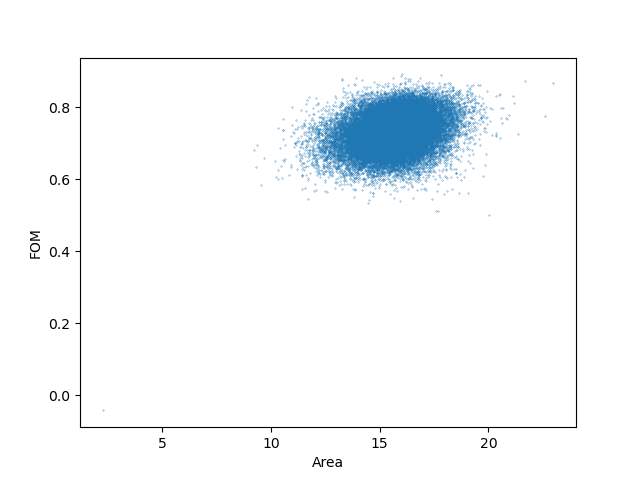

In [111]:
%matplotlib widget
plt.plot(dfNormalizedPulses["Area"], dfNormalizedPulses["FOM"], '.', markersize = 0.5)
plt.xlabel('Area')
plt.ylabel('FOM')
plt.show()

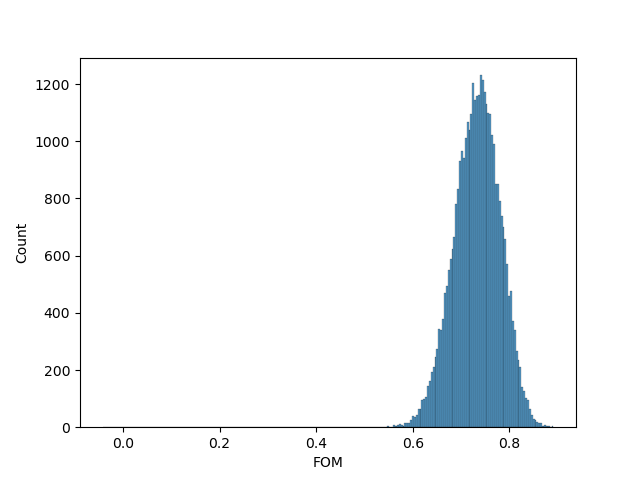

In [104]:
%matplotlib widget
sns.histplot(data = dfNormalizedPulses, x = "FOM")

plt.show()

### Comparing normalized neutrons to gammas

In [105]:
dfNeutronsNormalized = dfNormalizedPulses.loc[dfNeutrons.index]
dfGammasNormalized = dfNormalizedPulses.loc[dfGammas.index]

[]

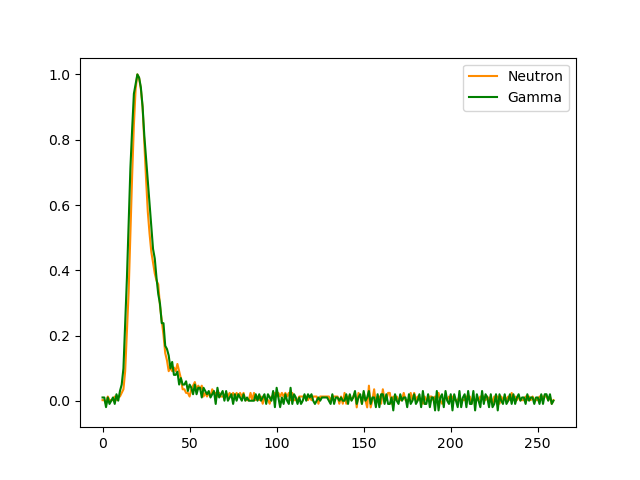

In [108]:
%matplotlib widget

startIndex = 20
numPlots = 1

plt.plot(dfNeutronsNormalized.iloc[startIndex:startIndex + numPlots,:reducedPulseLength].T, color = 'darkorange')
plt.plot(dfGammasNormalized.iloc[startIndex:startIndex + numPlots,:reducedPulseLength].T, color = 'green')
plt.xticks(ticks = range(0,reducedPulseLength, 50))
plt.legend(["Neutron", "Gamma"])
plt.plot()

## Generating tags of Neutrons and Gammas
### In a single file for NN training

In [39]:
pulsesIndexRange = [220,470]
GAMMA_CLASS = 0
NEUTRON_CLASS = 1

In [40]:
dfNeutrons = pd.read_csv('./data/output/neutronsCurveCluster.csv', index_col = 0)
dfGammas = pd.read_csv('./data/output/gammasCurveCluster.csv', index_col = 0)
dfRawPulses = pd.read_csv('./data/unsaturatedPulses.csv', index_col = 0)

In [41]:
dfRawPulses = dfRawPulses[dfRawPulses.columns[pulsesIndexRange[0]:pulsesIndexRange[1]]]
dfRawPulses

220  221  222  223  224  225  226  227  228  229  ...  460  461  462  \
0      134  133  132  134  132  135  132  133  134  132  ...  132  132  132   
1      134  133  132  134  132  135  132  133  134  132  ...  132  132  132   
2      134  133  132  134  132  135  132  133  134  132  ...  132  132  132   
3      134  133  132  134  132  135  132  133  134  132  ...  132  132  132   
4      134  133  132  134  132  135  132  133  134  132  ...  132  132  132   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
51393  133  133  134  132  133  134  132  134  132  133  ...  131  133  132   
51394  136  134  130  137  131  132  134  131  134  134  ...  133  134  133   
51395  133  134  133  133  133  133  133  134  133  134  ...  132  133  132   
51396  133  132  132  134  134  133  132  134  133  133  ...  133  133  133   
51397  132  134  132  133  133  132  133  134  132  134  ...  132  133  133   

       463  464  465  466  467  468  469  
0      134  133  134  132  134  132  133  
1      134  133  134  132  134  132  133  
2      134  133  134  132  134  132  133  
3      134  133  134  132  134  132  133  
4      134  133  134  132  134  132  133  
...    ...  ...  ...  ...  ...  ...  ...  
51393  132  133  134  133  135  132  134  
51394  132  133  133  132  134  133  134  
51395  132  133  132  132  134  132  134  
51396  134  132  133  132  133  132  134  
51397  133  133  134  132  133  132  134  

[51398 rows x 250 columns]

Extract indexes for each type of pulse

In [42]:
dfGammaTags = dfGammas.index.values
dfNeutronTags = dfNeutrons.index.values

Setting classes to individual pulse dataframes


In [43]:
dfRawPulsesGamma = dfRawPulses.loc[dfGammaTags].copy()
dfRawPulsesGamma['class'] = GAMMA_CLASS
dfRawPulsesNeutron = dfRawPulses.loc[dfNeutronTags].copy()
dfRawPulsesNeutron['class'] = NEUTRON_CLASS

Concatenate rows of gammas and neutrons

In [44]:
dfTaggedPulses = pd.concat([dfRawPulsesGamma, dfRawPulsesNeutron], axis = 0, ignore_index = False)
dfTaggedPulses = dfTaggedPulses.sort_index()
dfTaggedPulses

220  221  222  223  224  225  226  227  228  229  ...  461  462  463  \
0      134  133  132  134  132  135  132  133  134  132  ...  132  132  134   
5      133  132  133  134  132  134  133  133  133  132  ...  134  133  133   
10     133  133  133  133  133  132  133  134  133  134  ...  133  133  133   
11     133  134  133  133  133  133  132  133  132  133  ...  133  133  134   
12     133  135  131  135  132  133  134  132  134  133  ...  133  133  134   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
51393  133  133  134  132  133  134  132  134  132  133  ...  133  132  132   
51394  136  134  130  137  131  132  134  131  134  134  ...  134  133  132   
51395  133  134  133  133  133  133  133  134  133  134  ...  133  132  132   
51396  133  132  132  134  134  133  132  134  133  133  ...  133  133  134   
51397  132  134  132  133  133  132  133  134  132  134  ...  133  133  133   

       464  465  466  467  468  469  class  
0      133  134  132  134  132  133      0  
5      132  132  132  132  133  133      0  
10     132  133  131  134  132  134      0  
11     133  133  132  133  132  133      0  
12     132  134  132  133  132  133      0  
...    ...  ...  ...  ...  ...  ...    ...  
51393  133  134  133  135  132  134      0  
51394  133  133  132  134  133  134      0  
51395  133  132  132  134  132  134      0  
51396  132  133  132  133  132  134      0  
51397  133  134  132  133  132  134      0  

[36832 rows x 251 columns]

Exporting tagged file

In [48]:
dfTaggedPulses.to_csv('./data/output/mixedPulsesWithTags.csv')